# Comparison of the regressions between sea level height and wind data

The results of regressions with both observational and cmip6 data and the three different wind models (NearestPoint, Timmerman and Dangendorf) are performed



In this notebook, functions are used from: 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Comparison/code')

import import_data as imprt
import figures as figs
import functions as func
import spectral as spec

# Declare global variables
window = 20 # Smoothing window for lowpass filter

#### Load observational results and obtain detrended and smoothed timeseries

In [2]:
# Import tide gauge data file
tg_data = imprt.import_obs_slh_data()

In [3]:
# Import regression results

results_np_era5, results_tim_era5, results_dang_era5 = imprt.import_reg_results('results', 'era5')
timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

results_np_20cr, results_tim_20cr, results_dang_20cr = imprt.import_reg_results('results', '20cr')
timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

In [4]:
# Obtain smoothed timeseries

tg_data_lws = func.obs_lws_smoothed_df(tg_data, 20, 'tg')

ts_lws_np_era5 = func.obs_lws_smoothed_df(timeseries_np_era5, 20, 'reg')
ts_lws_tim_era5 = func.obs_lws_smoothed_df(timeseries_tim_era5, 20, 'reg')
ts_lws_dang_era5 = func.obs_lws_smoothed_df(timeseries_dang_era5, 20, 'reg')

ts_lws_np_20cr = func.obs_lws_smoothed_df(timeseries_np_20cr, 20, 'reg')
ts_lws_tim_20cr = func.obs_lws_smoothed_df(timeseries_tim_20cr, 20, 'reg')
ts_lws_dang_20cr = func.obs_lws_smoothed_df(timeseries_dang_20cr, 20, 'reg')

#### Load cmip6 regression results and obtain detrended and smoothed timeseries

In [5]:
# Open zos data file
zos = imprt.import_cmip6_slh_data()

In [6]:
# Import regression results
results_np_hist, results_tim_hist, results_dang_hist = imprt.import_reg_results('results', 'historical')
timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist = imprt.import_reg_results('timeseries', 'historical')

In [7]:
# Obtain smoothed timeseries
zos_lws = func.wc_cmip6_lws_smoothed_ds(zos.zos, 20)
ts_lws_np_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_np_hist.wind_total, 20)
ts_lws_tim_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_tim_hist.wind_total, 20)
ts_lws_dang_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_dang_hist.wind_total, 20)

#### Compare timeseries of wind contribution

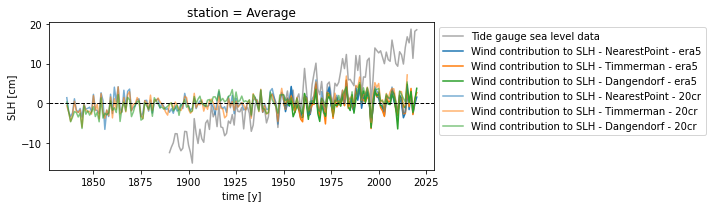

In [8]:
timeseries = [timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5, timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr]
labels = ['Tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data, timeseries, labels)

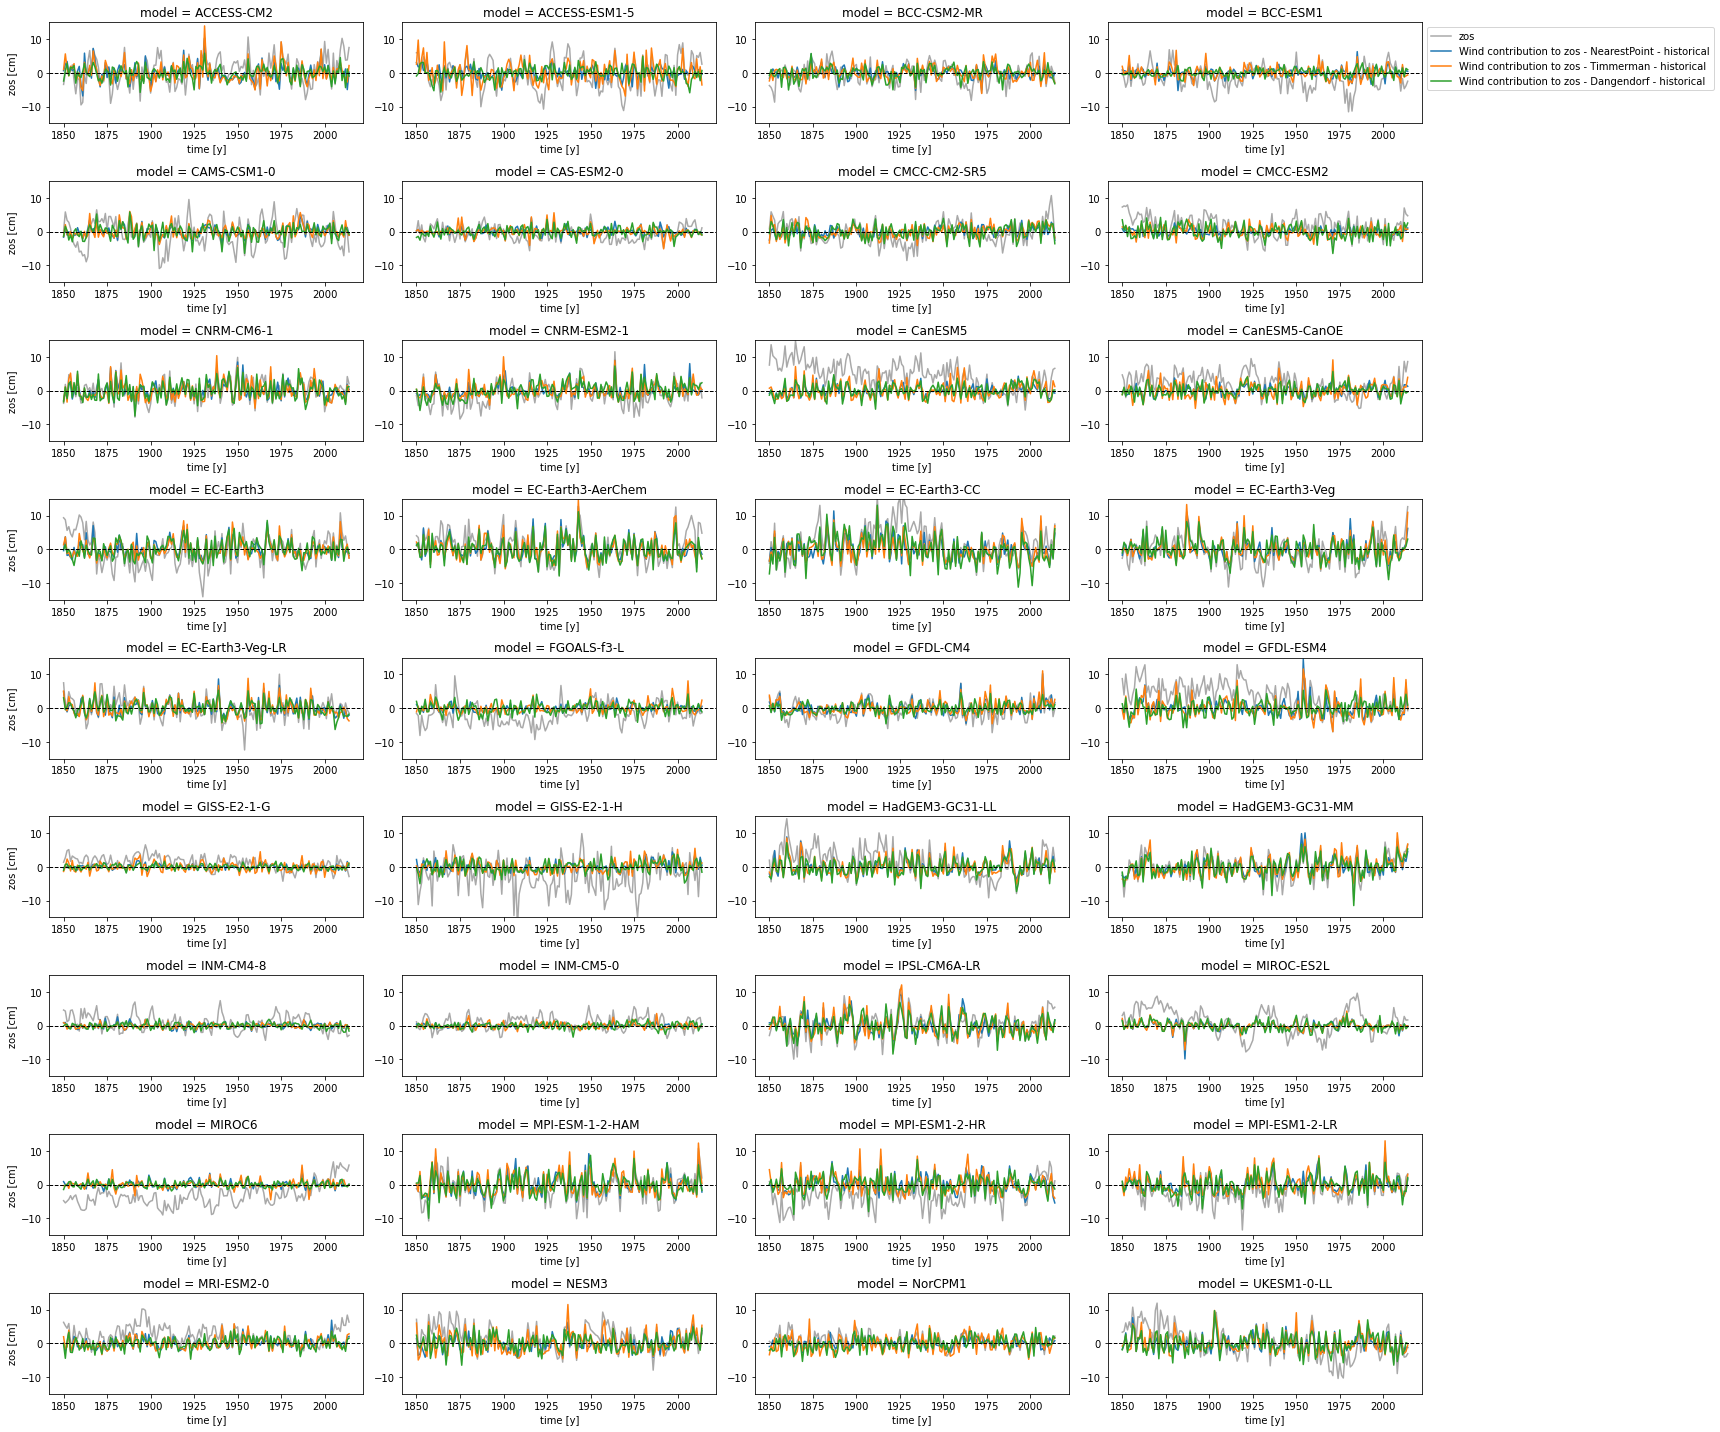

In [9]:
timeseries = [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos.zos, timeseries, labels, station = 'Average', show_zos = True)

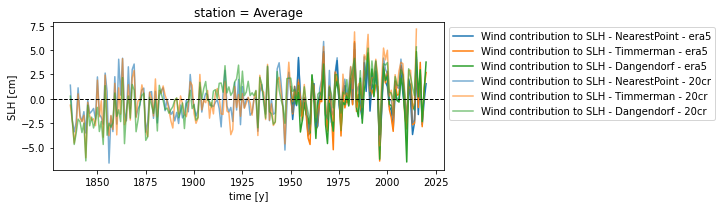

In [10]:
timeseries = [timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5, timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr]
labels = ['Tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data, timeseries, labels, show_tg=False)

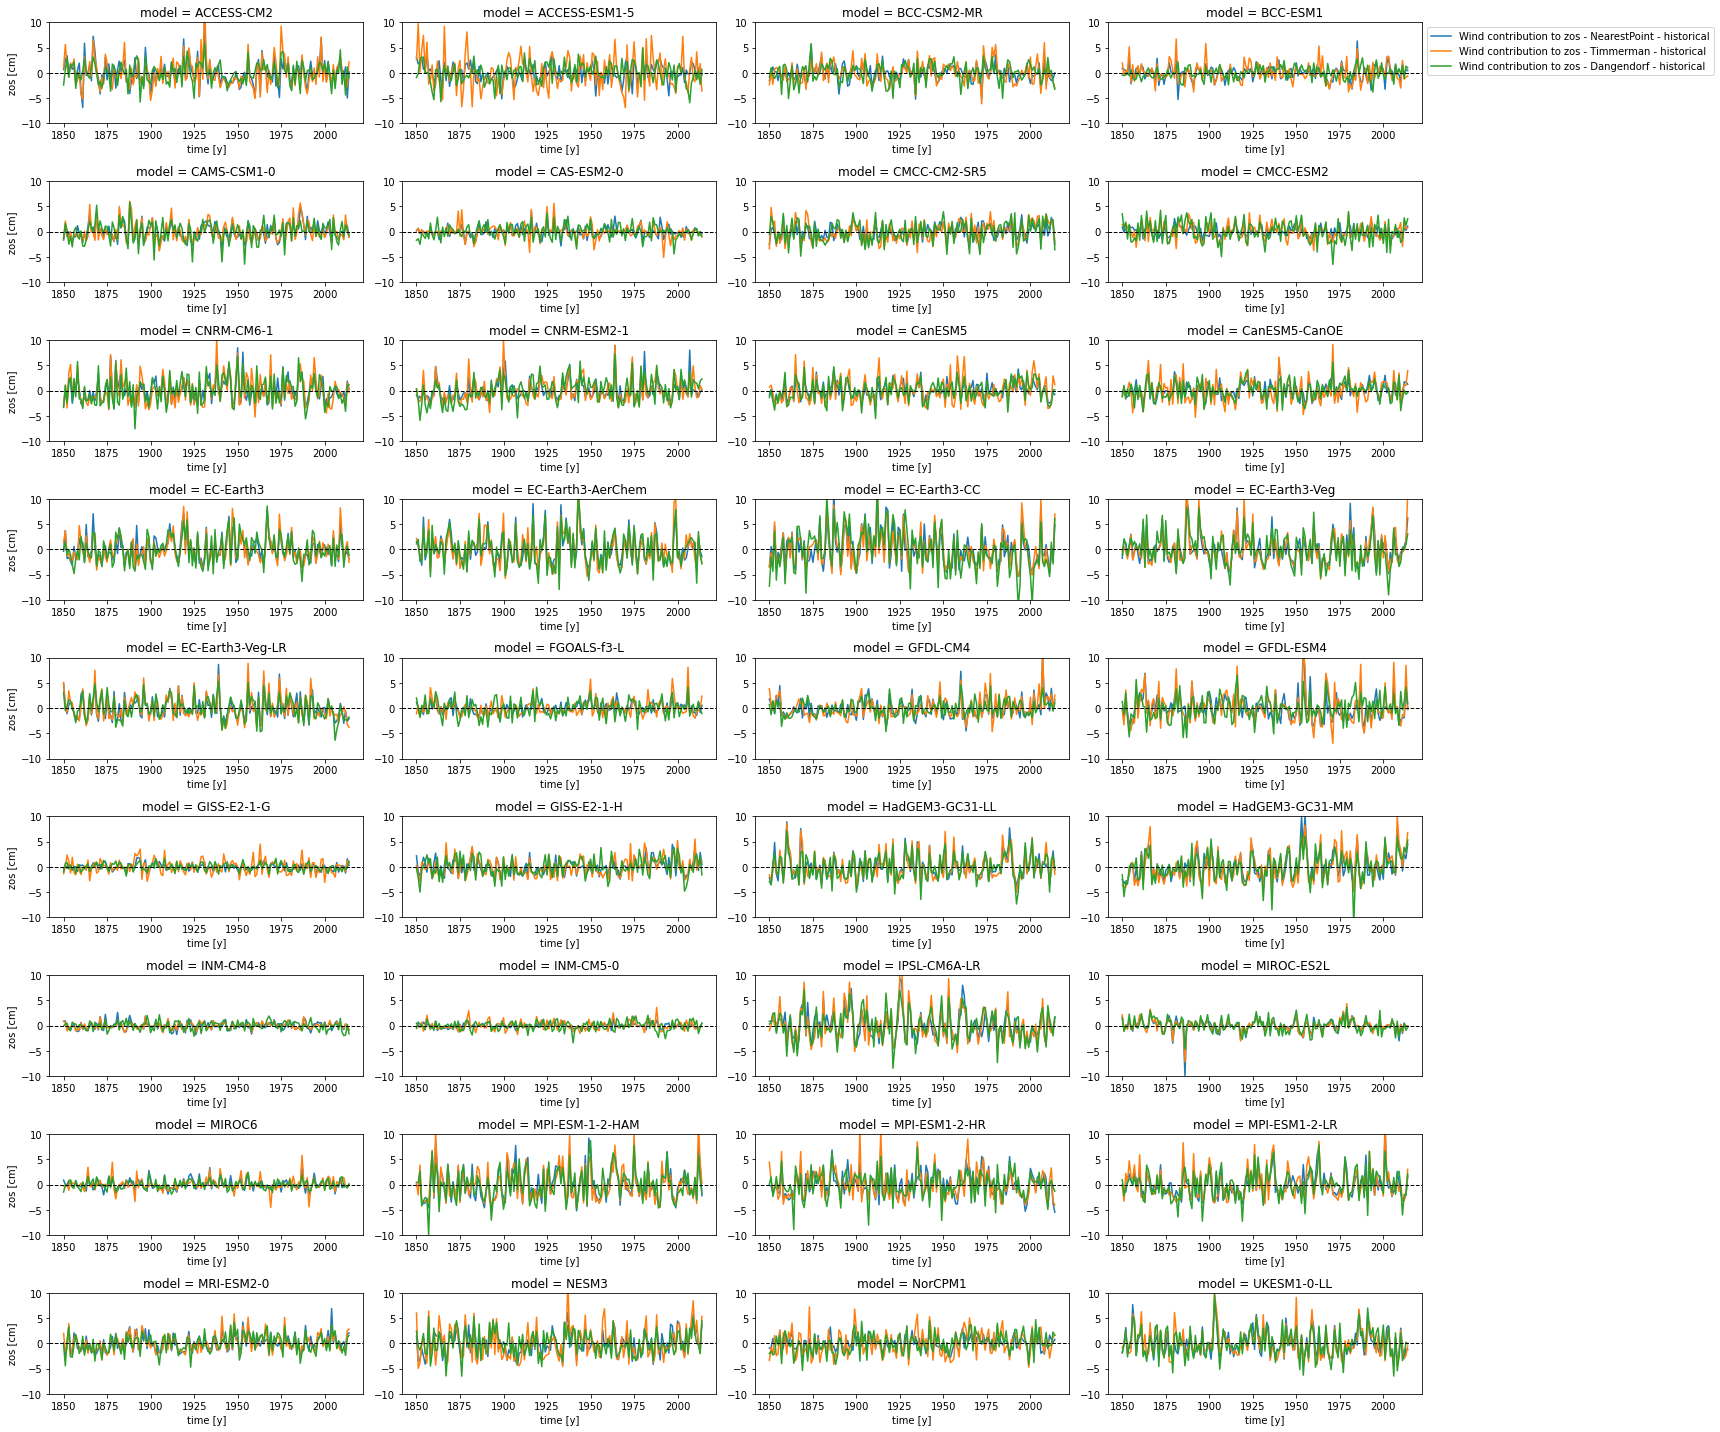

In [11]:
timeseries = [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos.zos, 
                                  [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total], 
                                  labels, station = 'Average', show_zos = False)

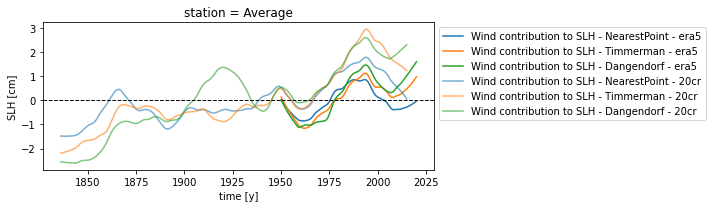

In [12]:
timeseries = [ts_lws_np_era5, ts_lws_tim_era5, ts_lws_dang_era5, ts_lws_np_20cr, ts_lws_tim_20cr, ts_lws_dang_20cr]
labels = ['Smoothed tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data_lws, timeseries, labels, show_tg=False, smoothed = True)

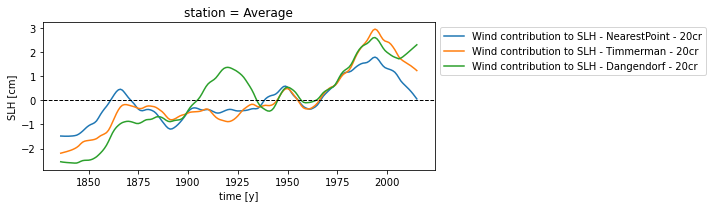

In [82]:
timeseries = [ts_lws_np_20cr, ts_lws_tim_20cr, ts_lws_dang_20cr]
labels = ['Smoothed tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data_lws, timeseries, labels, show_tg=False, smoothed = True)

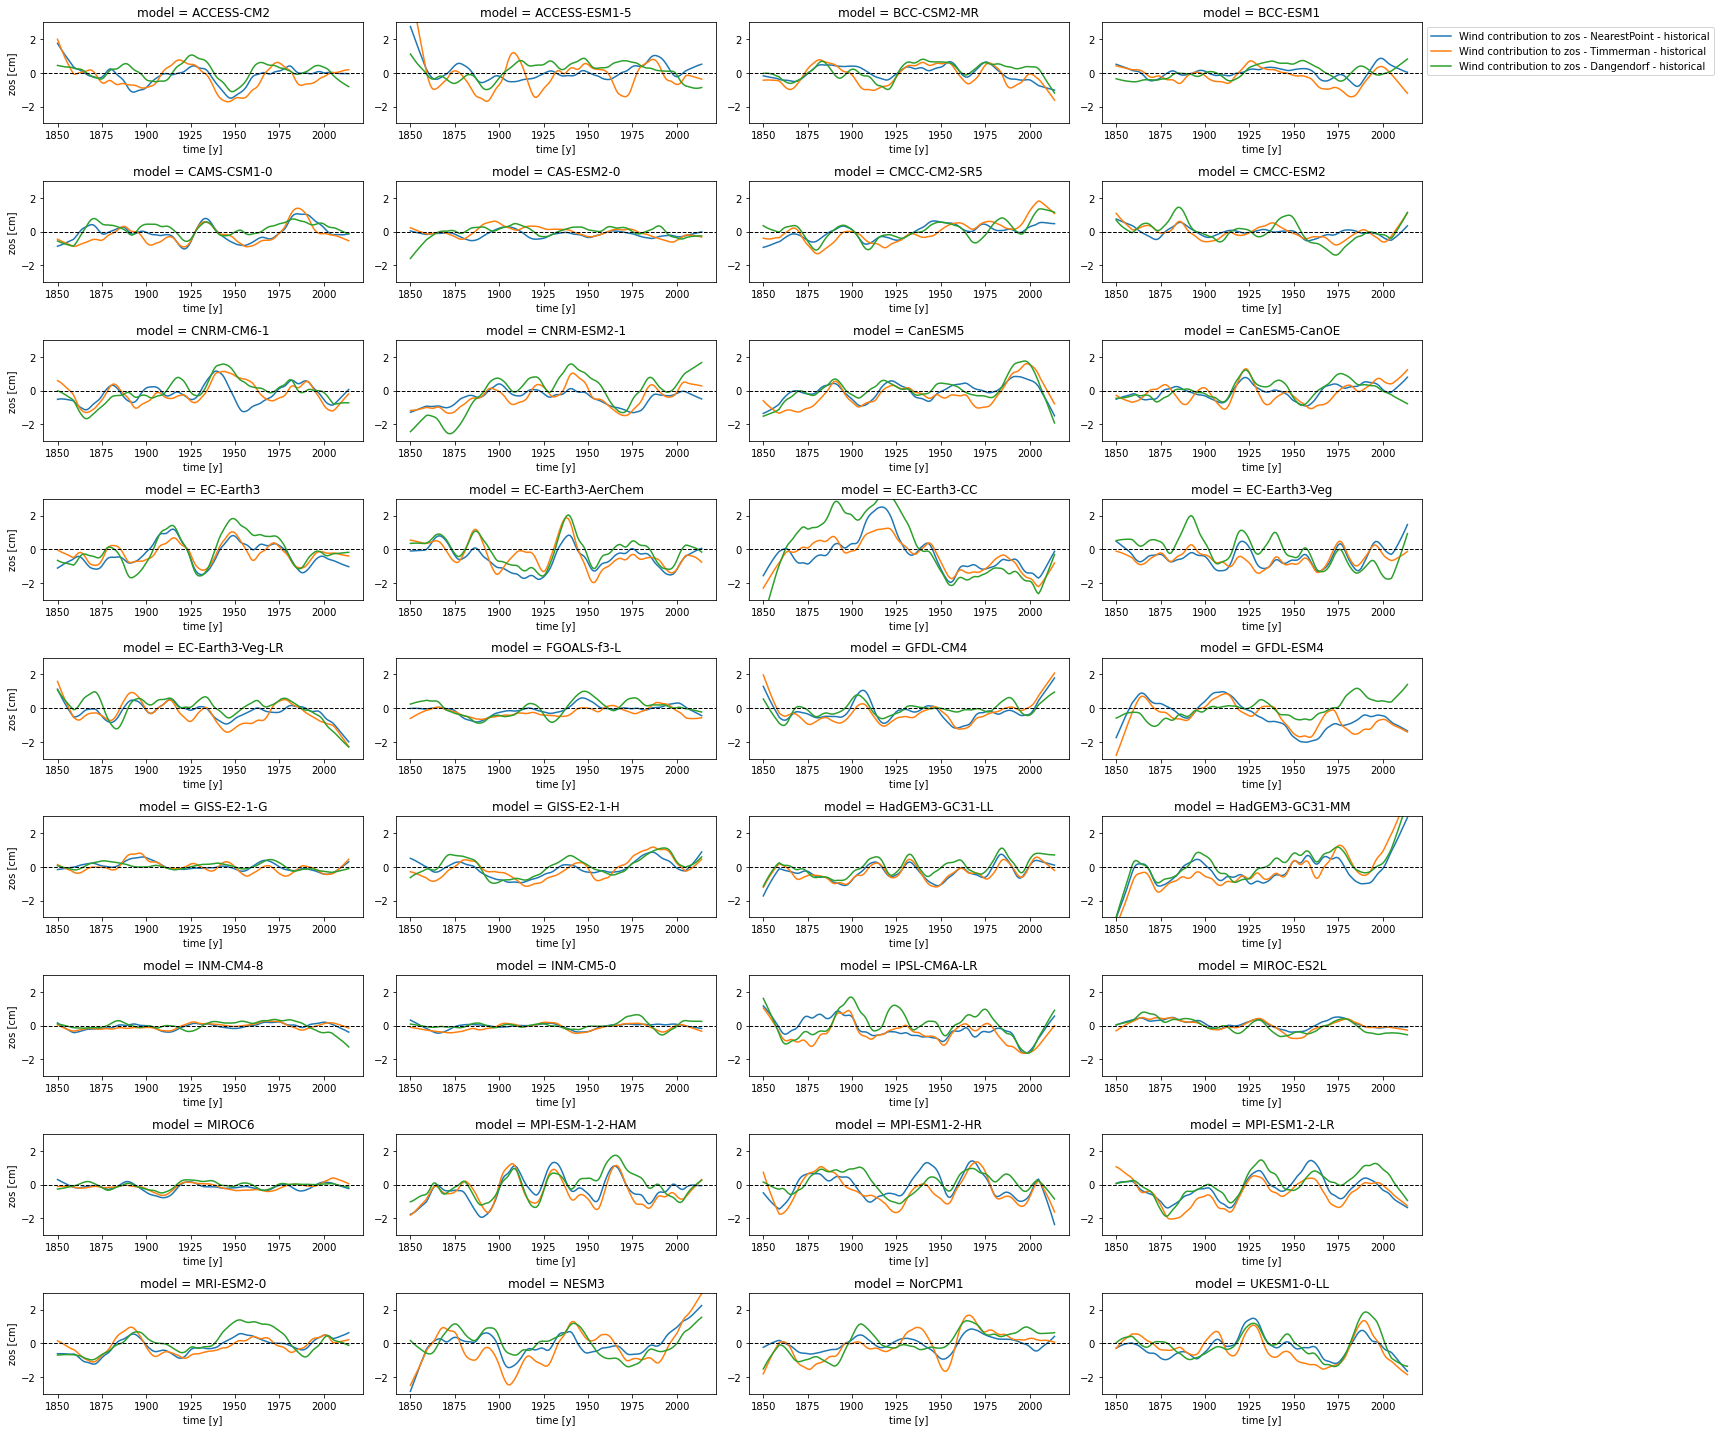

In [13]:
timeseries = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos_lws, 
                                  [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist], 
                                  labels, station = 'Average', show_zos = False, smoothed = True)

#### Compare trends of wind contribution

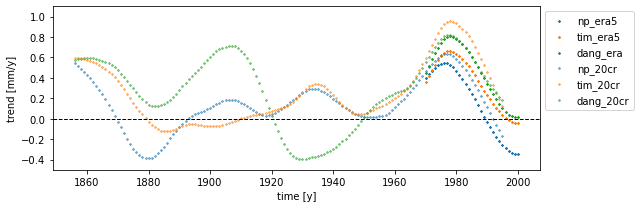

In [14]:
timeseries = [ts_lws_np_era5, ts_lws_tim_era5, ts_lws_dang_era5, ts_lws_np_20cr, ts_lws_tim_20cr, ts_lws_dang_20cr]
labels = ['np_era5', 'tim_era5', 'dang_era', 'np_20cr', 'tim_20cr', 'dang_20cr']



figs.plot_obs_running_trend(timeseries, labels, period_length = 40)

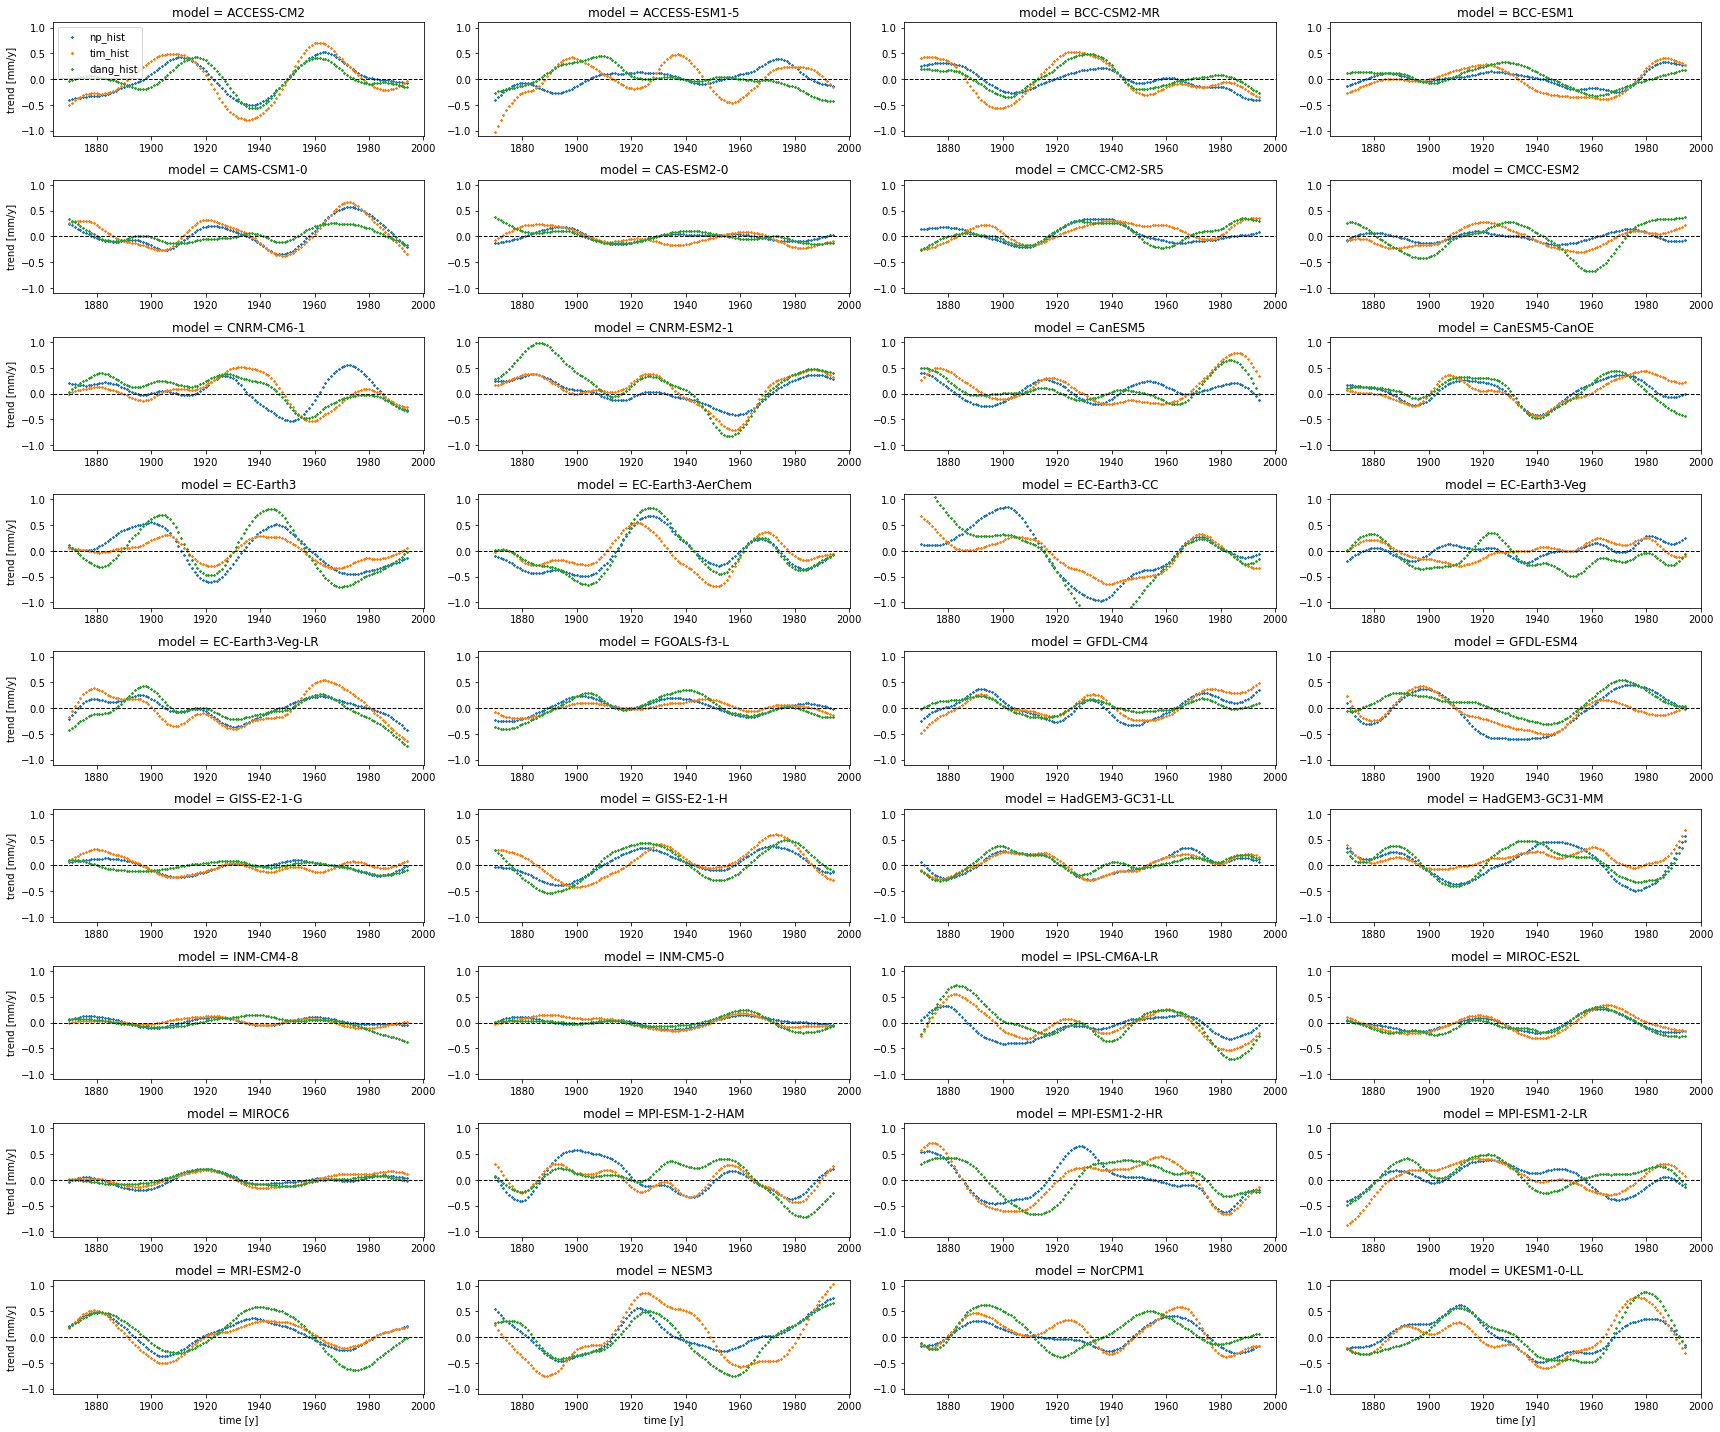

In [15]:
timeseries = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
labels = ['np_hist', 'tim_hist', 'dang_hist']

figs.plot_cmip6_running_trend(timeseries, labels, period_length = 40)

#### Compare regression coefficients

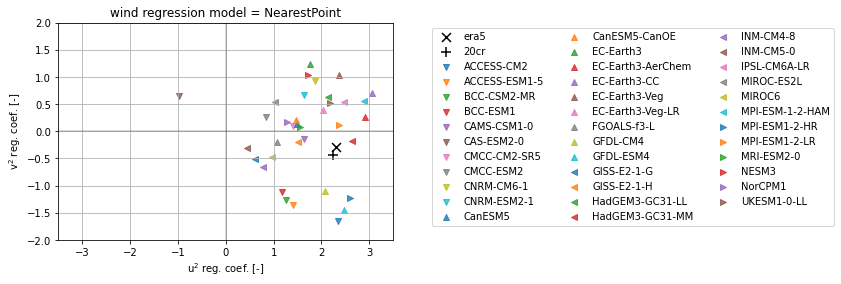

In [16]:
figs.plot_comp_reg_results_one_station(results_np_era5, results_np_20cr, results_np_hist, 'Average', 'NearestPoint')

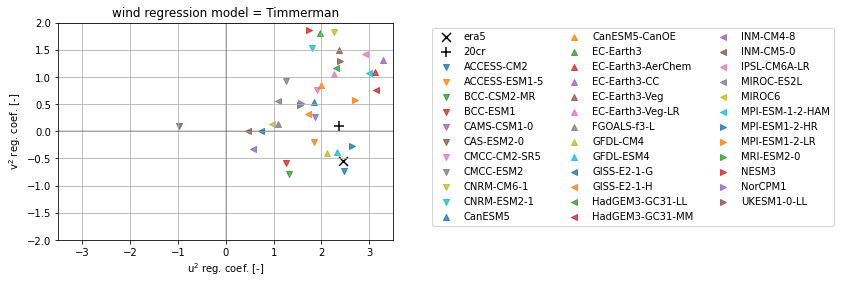

In [17]:
figs.plot_comp_reg_results_one_station(results_tim_era5, results_tim_20cr, results_tim_hist, 'Average', 'Timmerman')

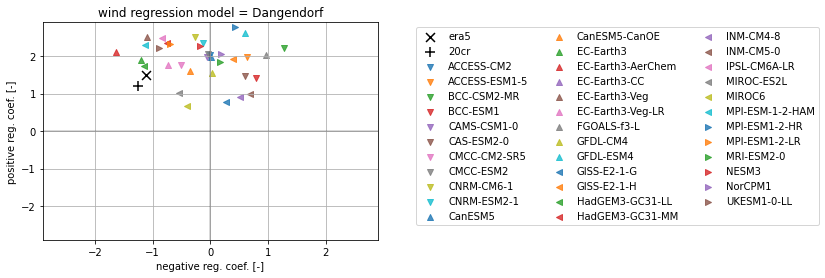

In [18]:
figs.plot_comp_reg_results_one_station(results_dang_era5, results_dang_20cr, results_dang_hist, 'Average', 'Dangendorf')

#### Compare R2

In [19]:
results_dang_era5

R$^2$  R$^2_{wind}$  R$^2_{neg}$  R$^2_{pos}$      RMSE  \
station                                                                       
Vlissingen       0.801600      0.248741     0.133054     0.254010  2.276742   
Hoek v. Holland  0.884070      0.254628     0.167607     0.258263  2.270442   
Den Helder       0.816029      0.396347     0.226339     0.389872  2.217856   
Delfzijl         0.825415      0.337329     0.187175     0.336460  2.798430   
Harlingen        0.795619      0.442750     0.319556     0.403543  2.473186   
IJmuiden         0.793103      0.333692     0.181379     0.332945  2.364913   
Average          0.863345      0.348896     0.209860     0.344622  2.052195   

                 constant  Negative corr region  Positive corr region  \
station                                                                 
Vlissingen       7.348812             -0.681923              1.112722   
Hoek v. Holland  9.960944             -1.357626              1.109602   
Den Helder       6.357774             -0.967950              1.713029   
Delfzijl         7.614678             -1.103294              1.920693   
Harlingen        5.832838             -1.732849              1.522820   
IJmuiden         7.142322             -0.809356              1.533373   
Average          7.376228             -1.108833              1.485373   

                    trend  
station                    
Vlissingen       3.911789  
Hoek v. Holland  5.413101  
Den Helder       3.449872  
Delfzijl         4.818281  
Harlingen        3.327244  
IJmuiden         3.631033  
Average          4.091887

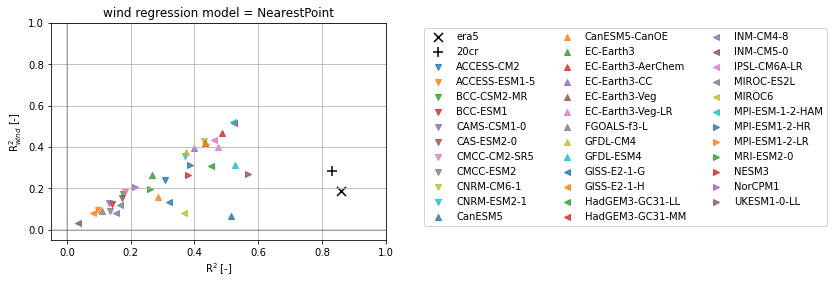

In [20]:
figs.plot_comp_r2_results_one_station(results_np_era5, results_np_20cr, results_np_hist, 'Average', 'NearestPoint')

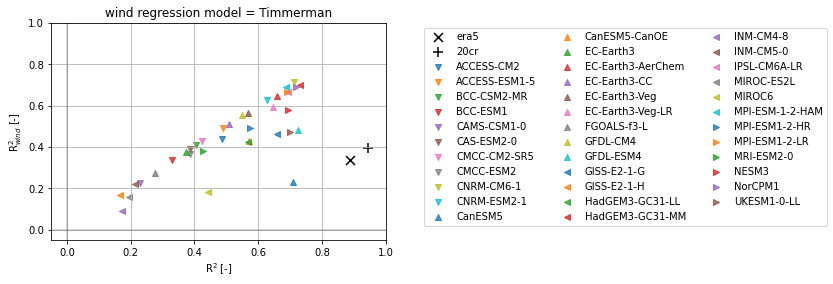

In [21]:
figs.plot_comp_r2_results_one_station(results_tim_era5, results_tim_20cr, results_tim_hist, 'Average', 'Timmerman')

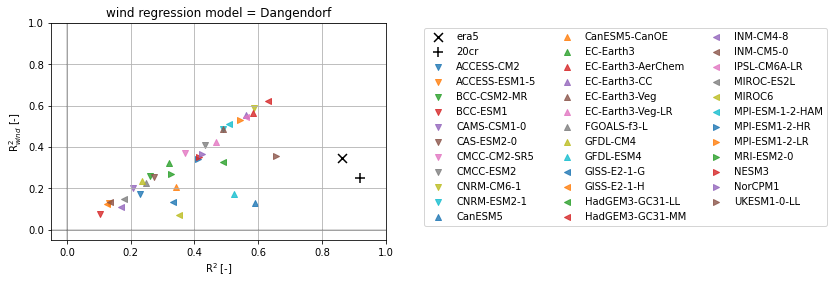

In [22]:
figs.plot_comp_r2_results_one_station(results_dang_era5, results_dang_20cr, results_dang_hist, 'Average', 'Dangendorf')

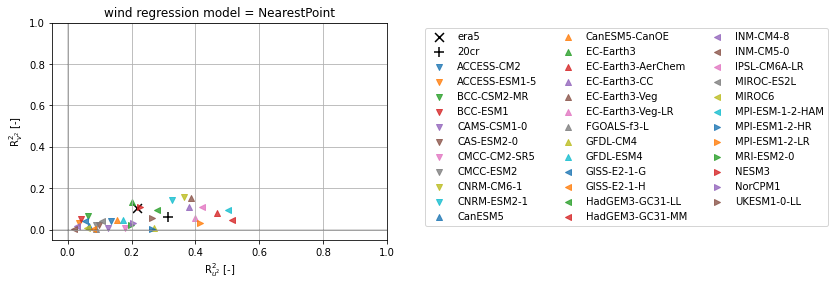

In [23]:
figs.plot_comp_r2_uv_results_one_station(results_np_era5, results_np_20cr, results_np_hist, 'Average', 'NearestPoint')

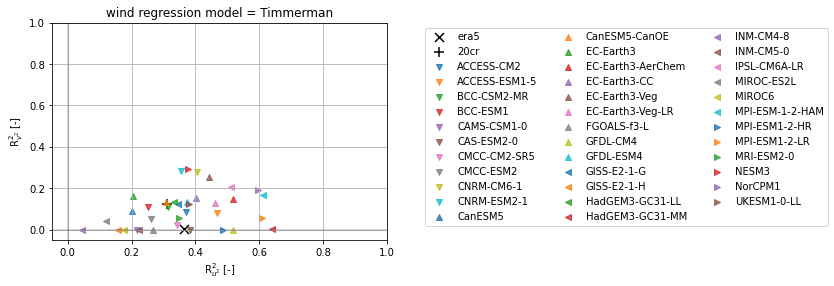

In [24]:
figs.plot_comp_r2_uv_results_one_station(results_tim_era5, results_tim_20cr, results_tim_hist, 'Average', 'Timmerman')

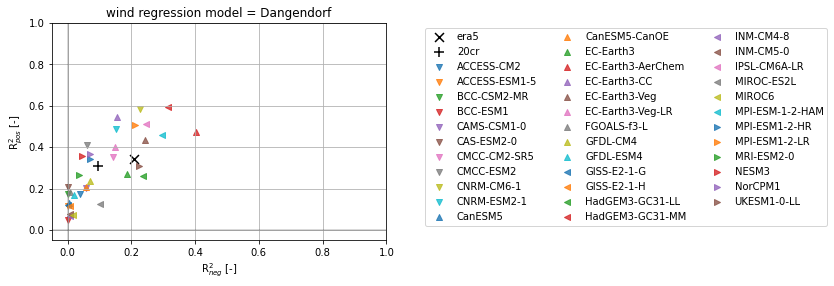

In [25]:
figs.plot_comp_r2_uv_results_one_station(results_dang_era5, results_dang_20cr, results_dang_hist, 'Average', 'Dangendorf')

### Compare sine fit results between observational and cmip6 results

The wind contribution to sea level height shows sinusoidal behaviour. We'll fit a sine function to be able to compare the amplitude and frequency of this fit. The phase is not so interesting as the cmip6 data could be easily shifted but our main interest is the behaviour of the wind contribution.


The wind contribution to sea level height is first detrended and than a lowess filter is applied. 

In [26]:
# Obtain detrended and smoothed observational timeseries
ts_dt_lws_np_era5 = func.obs_lws_smoothed_df(timeseries_np_era5, 20, 'reg', detrend_data = True)
ts_dt_lws_tim_era5 = func.obs_lws_smoothed_df(timeseries_tim_era5, 20, 'reg', detrend_data = True)
ts_dt_lws_dang_era5 = func.obs_lws_smoothed_df(timeseries_dang_era5, 20, 'reg', detrend_data = True)

ts_dt_lws_np_20cr = func.obs_lws_smoothed_df(timeseries_np_20cr, 20, 'reg', detrend_data = True)
ts_dt_lws_tim_20cr = func.obs_lws_smoothed_df(timeseries_tim_20cr, 20, 'reg', detrend_data = True)
ts_dt_lws_dang_20cr = func.obs_lws_smoothed_df(timeseries_dang_20cr, 20, 'reg', detrend_data = True)

In [27]:
# Obtain detrended and smoothed model timeseries
ts_lws_np_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_np_hist.wind_total, 20, detrend_data = True)
ts_lws_tim_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_tim_hist.wind_total, 20, detrend_data = True)
ts_lws_dang_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_dang_hist.wind_total, 20, detrend_data = True)

In [28]:
data_lst = [ts_dt_lws_np_era5, ts_dt_lws_tim_era5, ts_dt_lws_dang_era5,
           ts_dt_lws_np_20cr, ts_dt_lws_tim_20cr, ts_dt_lws_dang_20cr]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

obs_fits_df_40 = func.obtain_obs_sine_fits(data_lst, label_lst, 40)
obs_fits_df_60 = func.obtain_obs_sine_fits(data_lst, label_lst, 60)

In [29]:
obs_fits_df_40

np_era5             tim_era5             dang_era5             \
                value  variance      value   variance      value   variance   
parameter                                                                     
y_distance   0.112546  0.000178   0.180527   0.000516   0.321814   0.001239   
amplitude   -0.719202  0.000343  -0.623203   0.001014  -0.716865   0.002439   
frequency    0.125285  0.000002   0.137848   0.000006   0.145574   0.000009   
phase       63.552708  6.568594  38.416808  21.661514  23.156408  36.852168   
wavelength  50.151049       NaN  45.580434        NaN  43.161326        NaN   

              np_20cr              tim_20cr             dang_20cr             
                value   variance      value   variance      value   variance  
parameter                                                                     
y_distance  -0.002574   0.000871   0.015663   0.001688   0.084342   0.001932  
amplitude   -0.454837   0.001695  -0.361765   0.003315  -0.376346   0.003876  
frequency    0.152151   0.000003   0.151628   0.000010   0.154302   0.000010  
phase        9.912182  12.308236  10.635567  36.472253   4.959693  36.193819  
wavelength  41.295711        NaN  41.438294        NaN  40.720059        NaN

In [30]:
obs_fits_df_60

np_era5             tim_era5             dang_era5             \
                value  variance      value   variance      value   variance   
parameter                                                                     
y_distance   0.112546  0.000178   0.180527   0.000516   0.321813   0.001239   
amplitude    0.719202  0.000343   0.623203   0.001014   0.716865   0.002439   
frequency    0.125285  0.000002   0.137848   0.000006   0.145574   0.000009   
phase      -40.119547  6.568713 -65.255543  21.661553 -80.516050  36.852042   
wavelength  50.151110       NaN  45.580469        NaN  43.161341        NaN   

              np_20cr              tim_20cr             dang_20cr             
                value   variance      value   variance      value   variance  
parameter                                                                     
y_distance  -0.042848   0.000884  -0.001825   0.001347   0.075293   0.001798  
amplitude    0.476171   0.001701   0.506436   0.002635   0.469138   0.003366  
frequency    0.102133   0.000003   0.105477   0.000004   0.105405   0.000006  
phase        5.684183  10.318686  -1.375059  14.480122  -0.539168  23.447188  
wavelength  61.519705        NaN  59.569362        NaN  59.610117        NaN

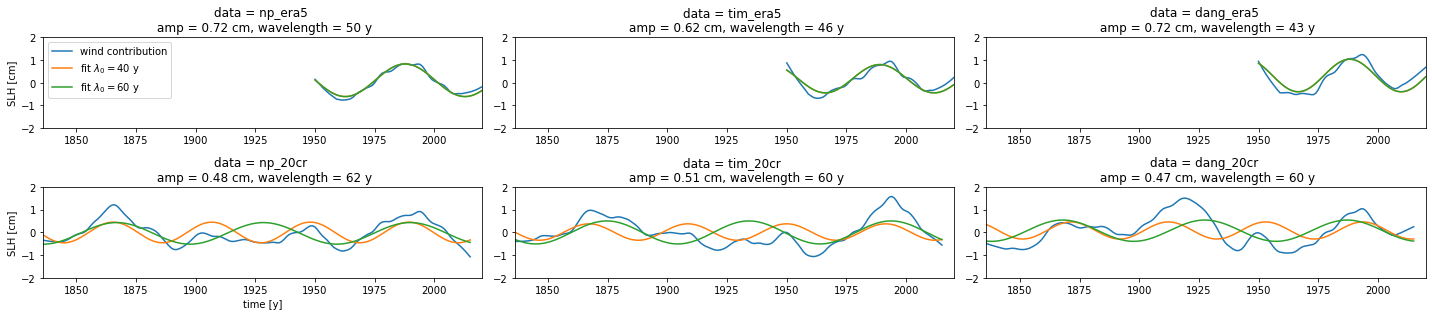

In [31]:
figs.plot_obs_sine_fits(data_lst, [obs_fits_df_40, obs_fits_df_60], label_lst, 
                        ['wind contribution', 'fit $\lambda_0=40$ y', 'fit $\lambda_0=60$ y'])

The outcomes of the wavelength are very much depending on initial values so I will perform the fitting with a whole range of initial values and check variances of results.

In [32]:
sine_fits_np_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_np_era5)
sine_fits_np_era5

30                   40                   50            \
                 value  variance      value  variance      value  variance   
parameter                                                                    
y_distance    0.112546  0.000178   0.112546  0.000178   0.112547  0.000178   
amplitude     0.719202  0.000343  -0.719202  0.000343  -0.719202  0.000343   
frequency     0.125285  0.000002   0.125285  0.000002   0.125285  0.000002   
phase       167.225583  6.568644  63.552708  6.568594   0.720693  6.568514   
wavelength   50.151113       NaN  50.151049       NaN  50.151016       NaN   

                   60                   70            
                value  variance      value  variance  
parameter                                             
y_distance   0.112546  0.000178   0.112546  0.000178  
amplitude    0.719202  0.000343   0.719202  0.000343  
frequency    0.125285  0.000002   0.125285  0.000002  
phase      -40.119547  6.568713 -71.535458  6.568730  
wavelength  50.151110       NaN  50.151114       NaN

In [33]:
sine_fits_tim_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_tim_era5)
sine_fits_tim_era5

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.180527   0.000516   0.180527   0.000516   0.180527   0.000516   
amplitude     0.623203   0.001014  -0.623203   0.001014  -0.623203   0.001014   
frequency     0.137848   0.000006   0.137848   0.000006   0.137848   0.000006   
phase       142.089155  21.661390  38.416808  21.661514 -24.414894  21.661417   
wavelength   45.580399        NaN  45.580434        NaN  45.580458        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance   0.180527   0.000516   0.180527   0.000516  
amplitude    0.623203   0.001014   0.623203   0.001014  
frequency    0.137848   0.000006   0.137848   0.000006  
phase      -65.255543  21.661553 -96.671445  21.661585  
wavelength  45.580469        NaN  45.580473        NaN

In [34]:
sine_fits_dang_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_dang_era5)
sine_fits_dang_era5

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.321813   0.001239   0.321814   0.001239   0.321812   0.001239   
amplitude     0.716865   0.002439  -0.716865   0.002439  -0.716866   0.002439   
frequency     0.145575   0.000009   0.145574   0.000009   0.145575   0.000009   
phase       126.828419  36.851729  23.156408  36.852168 -39.677188  36.851168   
wavelength   43.161244        NaN  43.161326        NaN  43.161064        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance   0.321813   0.001239   0.321813   0.001239  
amplitude    0.716865   0.002439   0.716865   0.002439  
frequency    0.145574   0.000009   0.145575   0.000009  
phase      -80.516050  36.852042 -99.365970  36.851918  
wavelength  43.161341        NaN  43.161286        NaN

In [35]:
sine_fits_np_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_np_20cr)
sine_fits_np_20cr

30                     40                    50             \
                value    variance      value   variance      value   variance   
parameter                                                                       
y_distance  -0.029606    0.001423  -0.002574   0.000871  -0.042848   0.000884   
amplitude    0.118420    0.002815  -0.454837   0.001695   0.476171   0.001701   
frequency    0.229184    0.000077   0.152151   0.000003   0.102133   0.000003   
phase      -35.705350  285.136628   9.912182  12.308236  43.383444  10.318734   
wavelength  27.415435         NaN  41.295711        NaN  61.519751        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance  -0.042848   0.000884  -0.042840   0.000884  
amplitude    0.476171   0.001701  -0.476168   0.001701  
frequency    0.102133   0.000003   0.102135   0.000003  
phase        5.684183  10.318686 -10.026960  10.317720  
wavelength  61.519705        NaN  61.518708        NaN

In [36]:
sine_fits_tim_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_tim_20cr)
sine_fits_tim_20cr

30                     40                    50             \
                value    variance      value   variance      value   variance   
parameter                                                                       
y_distance  -0.004185    0.002005   0.015663   0.001688  -0.001830   0.001347   
amplitude    0.117585    0.003904  -0.361765   0.003315  -0.506435   0.002635   
frequency    0.202811    0.000116   0.151628   0.000010   0.105475   0.000004   
phase       11.574037  430.132803  10.635567  36.472253  33.185686  14.479873   
wavelength  30.980528         NaN  41.438294        NaN  59.570321        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance  -0.001825   0.001347  -0.001825   0.001347  
amplitude    0.506436   0.002635   0.506436   0.002635  
frequency    0.105477   0.000004   0.105477   0.000004  
phase       -1.375059  14.480122 -32.791074  14.480160  
wavelength  59.569362        NaN  59.569336        NaN

In [37]:
sine_fits_dang_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_dang_20cr)
sine_fits_dang_20cr

30                     40                    50             \
                value    variance      value   variance      value   variance   
parameter                                                                       
y_distance   0.082537    0.002185   0.084342   0.001932   0.084342   0.001932   
amplitude    0.227585    0.004419  -0.376346   0.003876   0.376347   0.003876   
frequency    0.197499    0.000030   0.154302   0.000010   0.154301   0.000010   
phase       23.847480  110.339070   4.959693  36.193819 -54.729000  36.195006   
wavelength  31.813829         NaN  40.720059        NaN  40.720270        NaN   

                   60                     70             
                value   variance       value   variance  
parameter                                                
y_distance   0.075293   0.001798    0.112101   0.001371  
amplitude    0.469138   0.003366    0.593102   0.002445  
frequency    0.105405   0.000006    0.057943   0.000003  
phase       -0.539168  23.447188   60.808447  12.395819  
wavelength  59.610117        NaN  108.437962        NaN

Best wavelength results of fitting different wavelengths and checking occurence and variance

np_era5 = 48

tim_era5 = 40

dang_era5 = 41




np_20cr = 41 vs 64

tim_20cr = 41 vs 62

dang_20cr = 33 vs 42 vs 57

### Fit sine functions for model data

I will fit the models using either wavelength 40 or 60

In [38]:
data_lst = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
label_lst = ['NearestPoint', 'Timmerman', 'Dangendorf']

cmip6_fits_df_40, cmip6_perf_df_40 = func.obtain_cmip6_sine_fits(data_lst, label_lst, 40)
cmip6_fits_df_60, cmip6_perf_df_60 = func.obtain_cmip6_sine_fits(data_lst, label_lst, 60)

In [39]:
cmip6_fits_df_40

NearestPoint                                                  \
             ACCESS-CM2            ACCESS-ESM1-5            BCC-CSM2-MR   
                  value   variance         value   variance       value   
parameter                                                                 
y_distance     0.041415   0.001764      0.172595   0.001706    0.133080   
amplitude      0.285554   0.003455      0.251702   0.003365    0.320875   
frequency      0.159213   0.000019      0.140940   0.000024    0.133802   
phase         -3.754807  72.587515     30.065533  88.092438   44.131060   
wavelength    39.464024        NaN     44.580470        NaN   46.958847   

                                                                    ...  \
                        BCC-ESM1            CAMS-CSM1-0             ...   
             variance      value   variance       value   variance  ...   
parameter                                                           ...   
y_distance   0.000726  -0.056336   0.000496   -0.217142   0.001335  ...   
amplitude    0.001450   0.216649   0.000987   -0.234730   0.002726  ...   
frequency    0.000006   0.170979   0.000009    0.155750   0.000020  ...   
phase       22.619005 -26.389019  34.687827   -2.642696  74.956985  ...   
wavelength        NaN  36.748308        NaN   40.341564        NaN  ...   

              Dangendorf                                              \
           MPI-ESM1-2-LR           MRI-ESM2-0                  NESM3   
                   value  variance      value    variance      value   
parameter                                                              
y_distance     -0.664740  0.001186  -0.446720    0.002247   0.101143   
amplitude       0.699873  0.002349   0.147942    0.004368   0.135310   
frequency       0.187218  0.000002   0.163264    0.000095   0.147607   
phase         -57.978230  7.824270 -11.759372  356.578075  18.434561   
wavelength     33.560722       NaN  38.484831         NaN  42.567111   

                                                                      
                           NorCPM1            UKESM1-0-LL             
              variance       value   variance       value   variance  
parameter                                                             
y_distance    0.003221   -0.893918   0.000877    0.030431   0.003021  
amplitude     0.006379   -0.495696   0.001698   -0.503918   0.006017  
frequency     0.000148    0.107062   0.000003    0.171112   0.000010  
phase       551.083849  101.832225  11.653509  -28.111502  38.789912  
wavelength         NaN   58.687234        NaN   36.719760        NaN  

[5 rows x 216 columns]

In [40]:
cmip6_fits_df_60

NearestPoint                                                  \
             ACCESS-CM2            ACCESS-ESM1-5            BCC-CSM2-MR   
                  value   variance         value   variance       value   
parameter                                                                 
y_distance     0.012567   0.001093      0.132340   0.001657    0.143636   
amplitude      0.551889   0.002153      0.295254   0.003254   -0.371857   
frequency      0.093884   0.000003      0.092284   0.000017    0.085550   
phase         22.254471  11.550213     25.068484  62.093900   31.321416   
wavelength    66.925012        NaN     68.085003        NaN   73.444260   

                                                                    ...  \
                        BCC-ESM1            CAMS-CSM1-0             ...   
             variance      value   variance       value   variance  ...   
parameter                                                           ...   
y_distance   0.000625  -0.037340   0.000507   -0.217229   0.000861  ...   
amplitude    0.001115   0.266845   0.000896    0.473405   0.001616  ...   
frequency    0.000005   0.073916   0.000006    0.114450   0.000003  ...   
phase       17.918540  59.843798  22.680480  -18.656846  13.046881  ...   
wavelength        NaN  85.003856        NaN   54.899109        NaN  ...   

              Dangendorf                                                       \
           MPI-ESM1-2-LR            MRI-ESM2-0                NESM3             
                   value   variance      value  variance      value  variance   
parameter                                                                       
y_distance     -0.689712   0.002165  -0.356407  0.000699   0.056664  0.001255   
amplitude       0.435826   0.004264  -0.730904  0.001402   0.788328  0.002408   
frequency       0.093495   0.000010   0.096216  0.000001   0.098635  0.000002   
phase          22.896970  36.723728  17.190877  4.096055  10.950937  6.999498   
wavelength     67.203290        NaN  65.302872       NaN  63.701175       NaN   

                                                        
              NorCPM1            UKESM1-0-LL            
                value   variance       value  variance  
parameter                                               
y_distance  -0.893912   0.000877   -0.086208  0.001960  
amplitude   -0.495695   0.001698    0.801287  0.003989  
frequency    0.107060   0.000003    0.098802  0.000002  
phase       -4.977773  11.653452   12.076300  8.987982  
wavelength  58.688421        NaN   63.593998       NaN  

[5 rows x 216 columns]

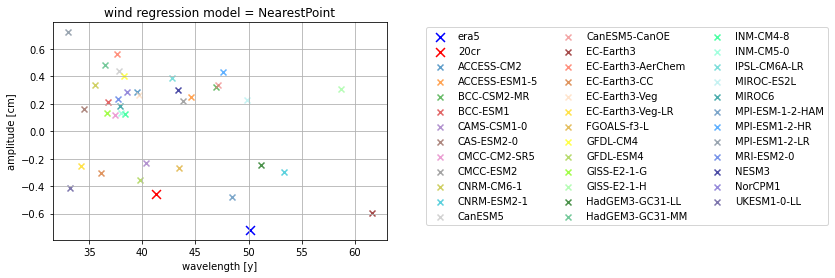

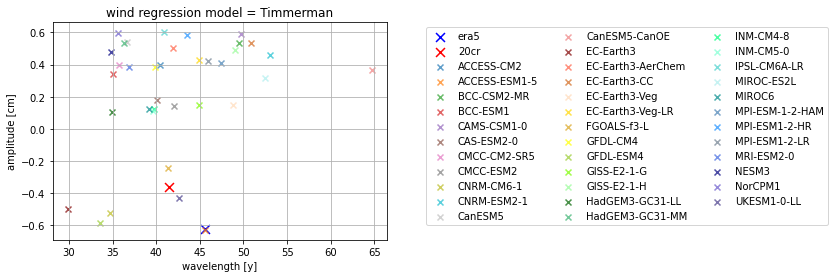

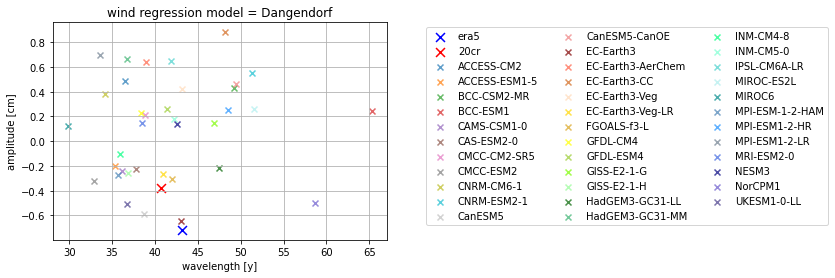

In [41]:
figs.plot_comp_cmip6_fit_results(obs_fits_df_40, cmip6_fits_df_40)

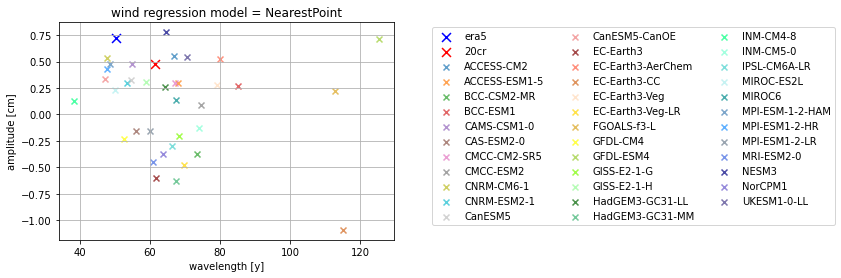

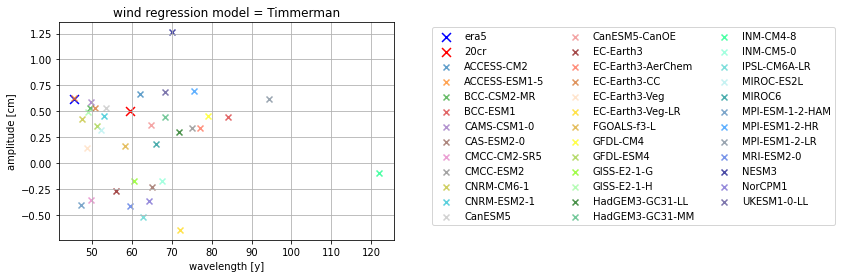

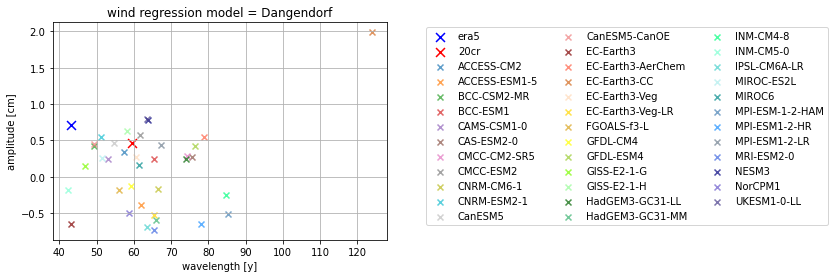

In [42]:
figs.plot_comp_cmip6_fit_results(obs_fits_df_60, cmip6_fits_df_60)

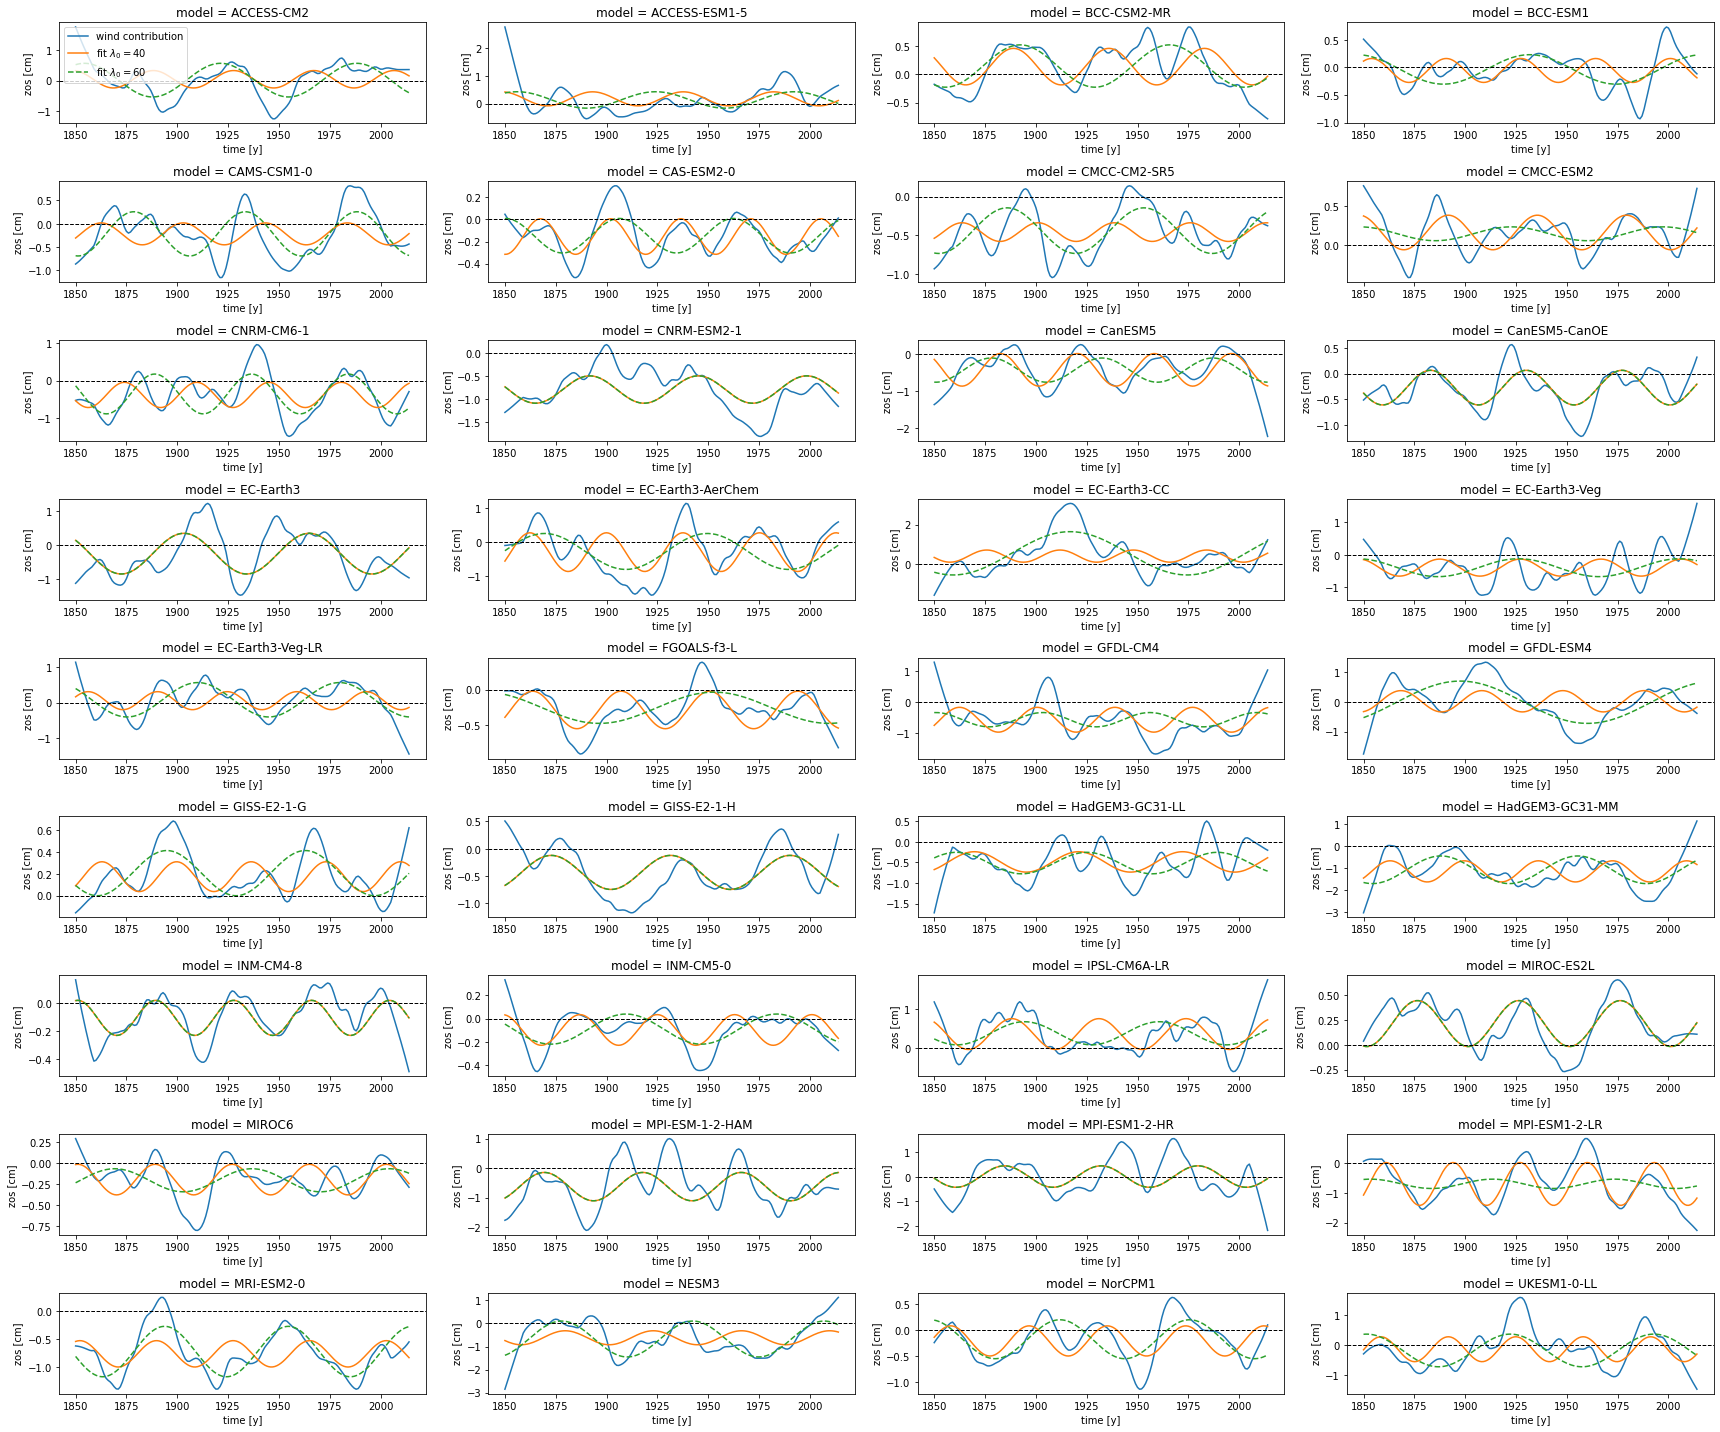

In [43]:
# Plot the cmip6 timeseries for wind model 'NearestPoint' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_np_hist.sel(station='Average'), cmip6_fits_df_40['NearestPoint'], cmip6_fits_df_60['NearestPoint'])

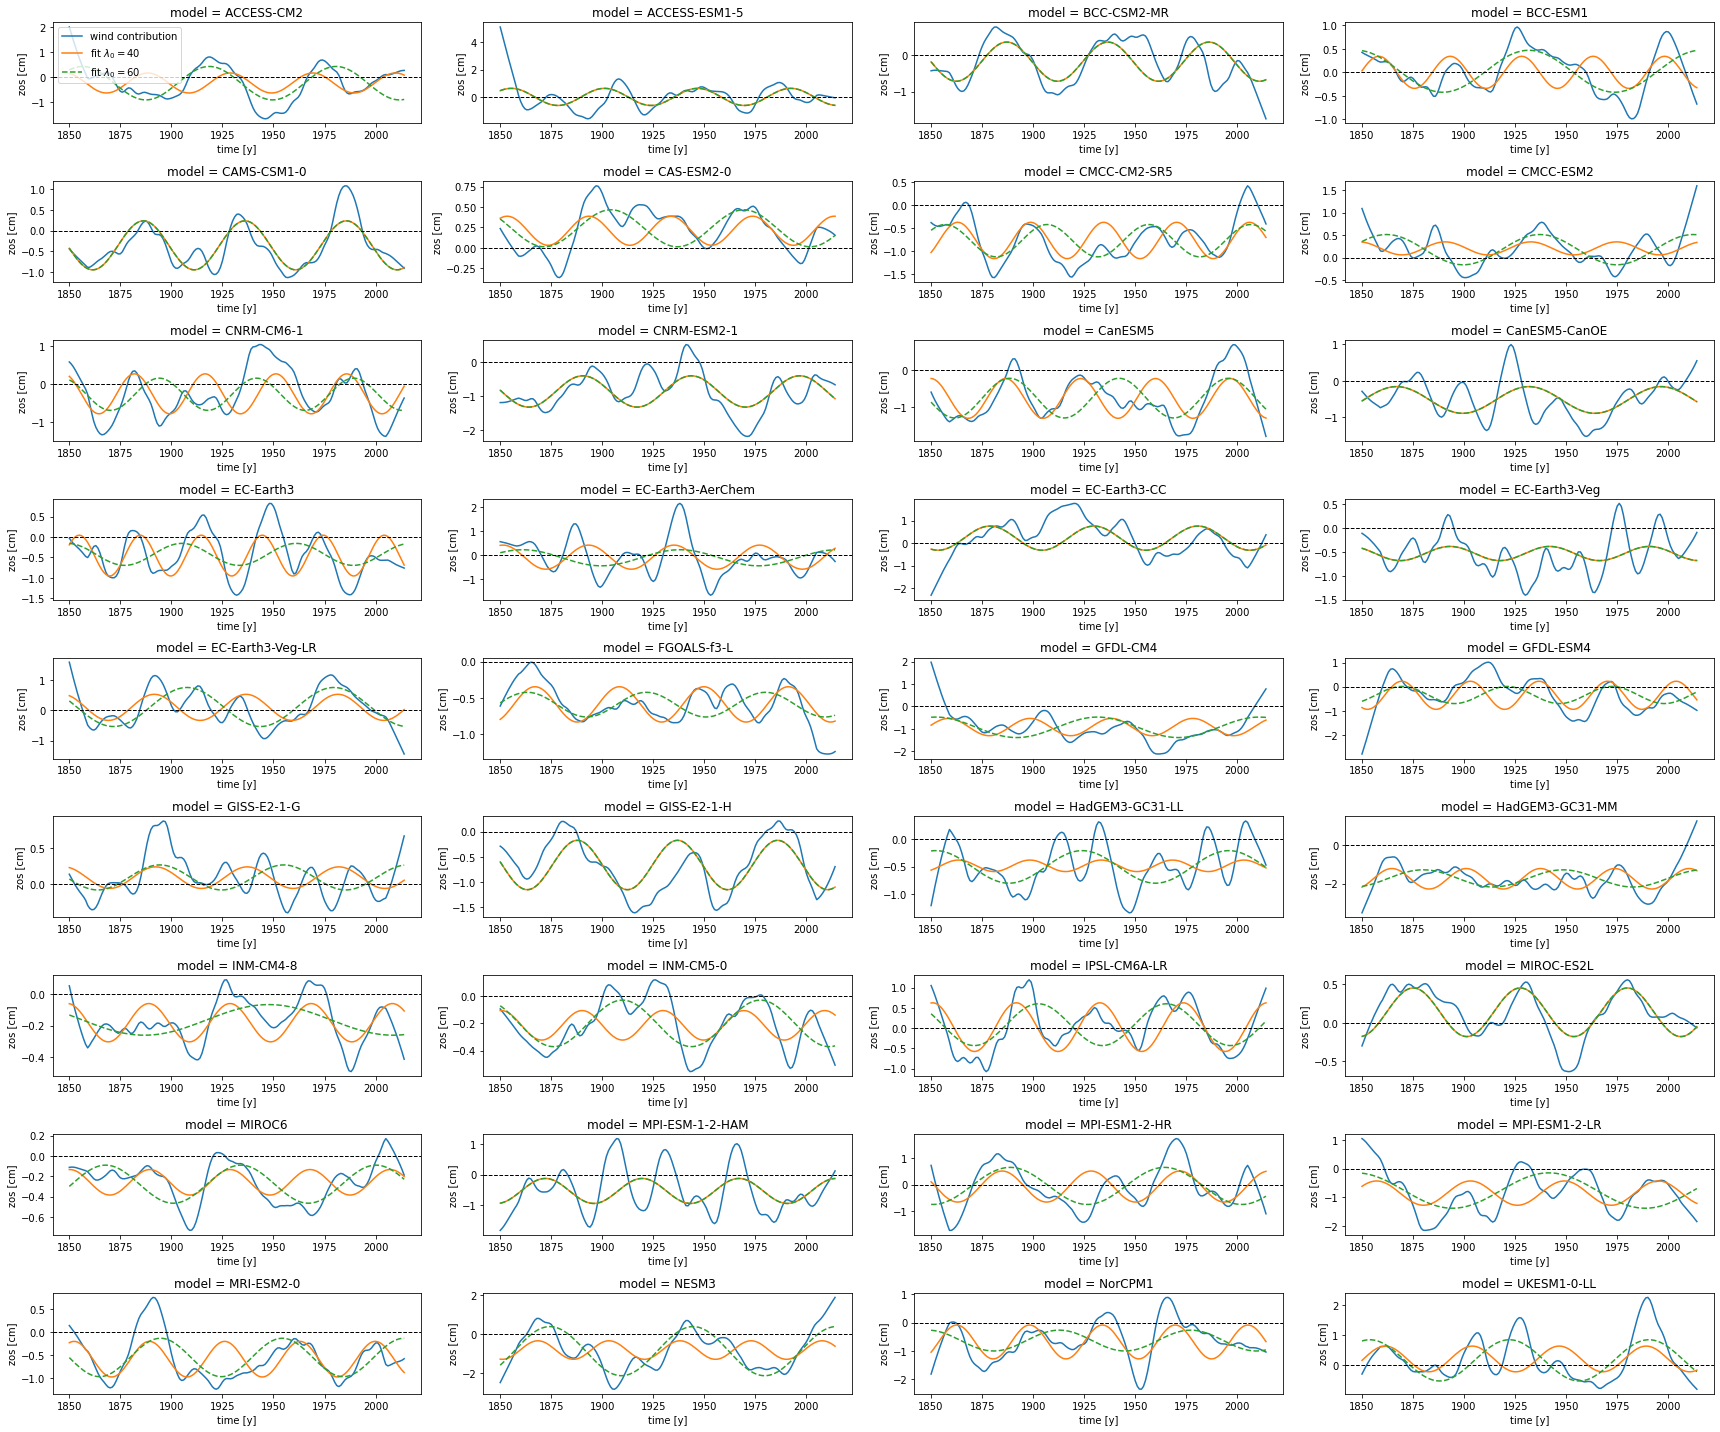

In [44]:
# Plot the cmip6 timeseries for wind model 'Timmerman' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_tim_hist.sel(station='Average'), cmip6_fits_df_40['Timmerman'], cmip6_fits_df_60['Timmerman'])

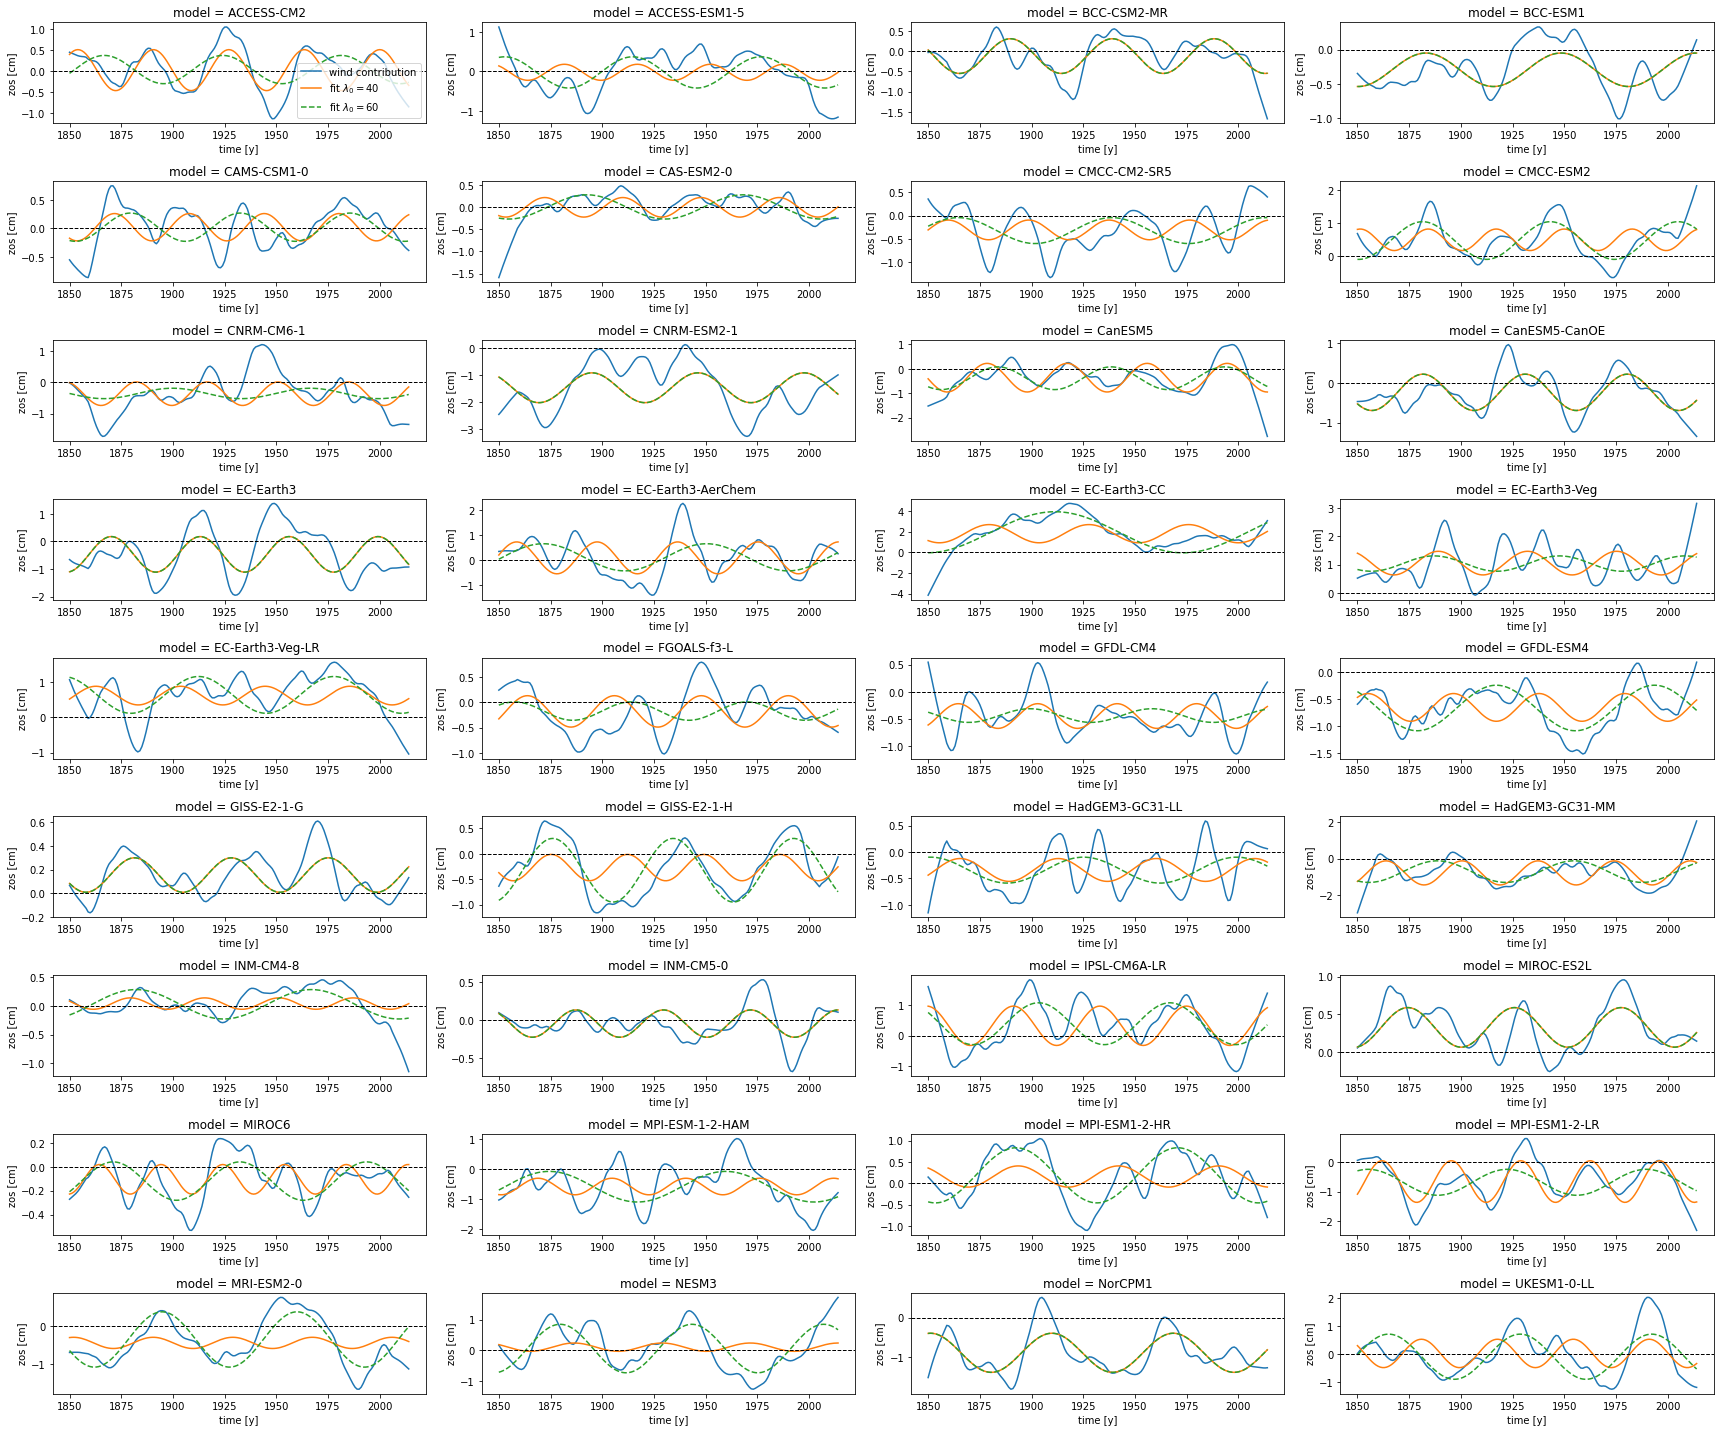

In [45]:
# Plot the cmip6 timeseries for wind model 'Dangendorf' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_dang_hist.sel(station='Average'), cmip6_fits_df_40['Dangendorf'], cmip6_fits_df_60['Dangendorf'])

#### As fitting a sine doesn't give a clear choice for wavelength I will now perform a fourier transform


The positive frequency terms are contained in y[1], ..., y[N/2 - 1]. Typically, only the FFT corresponding to positive frequencies is plotted.

In [46]:
from scipy.fft import fft, ifft, fftfreq

In [47]:
data_lst = [ts_dt_lws_np_era5, ts_dt_lws_tim_era5, ts_dt_lws_dang_era5,
           ts_dt_lws_np_20cr, ts_dt_lws_tim_20cr, ts_dt_lws_dang_20cr]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

In [48]:
ts_dt_lws_tim_20cr

Vlissingen  Hoek v. Holland  Den Helder  Delfzijl  Harlingen  IJmuiden  \
time                                                                           
1836   -0.102861        -0.362172   -0.535620 -0.713604  -0.823556 -0.335052   
1837   -0.116761        -0.367127   -0.519951 -0.675679  -0.786830 -0.329604   
1838   -0.129620        -0.369680   -0.502860 -0.636368  -0.746875 -0.323144   
1839   -0.142187        -0.371230   -0.485990 -0.597501  -0.705714 -0.316964   
1840   -0.153840        -0.371403   -0.468815 -0.558522  -0.663284 -0.310385   
...          ...              ...         ...       ...        ...       ...   
2011   -0.454728        -0.120540   -0.369393 -0.166439   0.146351 -0.389694   
2012   -0.584350        -0.174078   -0.461598 -0.222281   0.173312 -0.511123   
2013   -0.718907        -0.231336   -0.559583 -0.284365   0.194674 -0.636602   
2014   -0.860094        -0.293165   -0.664120 -0.353531   0.210393 -0.767348   
2015   -1.007837        -0.358089   -0.773340 -0.427574   0.223628 -0.902403   

       Average  
time            
1836 -0.400053  
1837 -0.399295  
1838 -0.396520  
1839 -0.393097  
1840 -0.388347  
...        ...  
2011 -0.223657  
2012 -0.300102  
2013 -0.380998  
2014 -0.467619  
2015 -0.558554  

[180 rows x 7 columns]

In [49]:
import matplotlib.pyplot as plt

N = ts_dt_lws_np_era5['Average'].size # Number of sample points
T = 1 # Sample spacing, 1 year

fourier_fit = fft(ts_dt_lws_np_era5['Average'].values)
inverse_fourier_fit = ifft(ts_dt_lws_np_era5['Average'].values)
four_freq = fftfreq(N, T)[:N//2]
plt.figure(figsize=(9,2))
plt.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
#plt.xlim(0,80)
plt.grid()
plt.xlabel('Wavelength [y]')
plt.ylabel('Power')
plt.show()

NameError: name 'np' is not defined

<Figure size 648x144 with 0 Axes>

In [ ]:
N = timeseries_np_era5['Average', 'wind total'].size # Number of sample points
T = 1 # Sample spacing, 1 year

fourier_fit = fft(timeseries_np_era5['Average', 'wind total'].values)
inverse_fourier_fit = ifft(timeseries_np_era5['Average', 'wind total'].values)
four_freq = fftfreq(N, T)[:N//2]
plt.figure(figsize=(9,2))
plt.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
#plt.xlim(0,80)
plt.grid()
plt.xlabel('Wavelength [y]')
plt.ylabel('Power')
plt.show()

In [ ]:
def obs_fourier_plot(data_lst, label_lst):
    """
    Function to make a plot of the trends over the whole timeseries of both 
    tide gauge observations and regression results per station averaged over all models
    
    For var choose a list consisting of ['u$^2$', 'v$^2$', 'trend', 'total', 'wind total']
    
    """
    T = 1 # Sample spacing, 1 year
    
    
    
    fig, axs = plt.subplots(3, 2, figsize=(12, 7))
    
    for i in range(3):
        
        
        ax = axs[i,0]
        
        data = data_lst[2*i]
        N = data.size # Number of sample points
        fourier_fit = fft(data.values)
        four_freq = fftfreq(N, T)[:N//2]
        
        ax.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
        ax.grid()
        if i == 2:
            ax.set_xlabel('Wavelength [y]')
        ax.set_ylabel('Power')
        ax.set_title(label_lst[2*i])
        plt.tight_layout()
        
        ax = axs[i,1]
        
        data = data_lst[2*i+1]
        N = data.size # Number of sample points
        fourier_fit = fft(data.values)
        four_freq = fftfreq(N, T)[:N//2]
        
        ax.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
        ax.grid()
        if i == 2:
            ax.set_xlabel('Wavelength [y]')
        ax.set_title(label_lst[2*i+1])
        plt.tight_layout()

In [ ]:
data_lst = [timeseries_np_era5['Average', 'wind total'], timeseries_tim_era5['Average', 'wind total'], 
            timeseries_dang_era5['Average', 'wind total'],timeseries_np_20cr['Average', 'wind total'], 
            timeseries_tim_20cr['Average', 'wind total'], timeseries_dang_20cr['Average', 'wind total']]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

obs_fourier_plot(data_lst, label_lst)

#### Spectral analysis

Aim: compare variance of observations and models

In [50]:
# Create detrended dataframe of observed data containing wind contribution to sea level for the average station
timeseries_obs_era5 = func.obs_one_var_one_station_df(timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5)
timeseries_obs_20cr = func.obs_one_var_one_station_df(timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr)

# Create detrended dataframe of cmip6 data containing wind contribution to sea level for the average station
timeseries_cmip6_hist = func.cmip6_one_var_one_station_df(timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist)


In [51]:
def detrend_dim(da, dim, deg=1): 
    """
    Function that detrends the data from a dataarray along a single dimension
    deg=1 for linear fit
    
    """
    
    p = da.polyfit(dim=dim, deg=deg)
    coord = da[dim] - da[dim].values[0]
    trend = coord*p.polyfit_coefficients.sel(degree=1)
    return da - trend

In [52]:
import pandas as pd
from scipy.signal import periodogram
from scipy.signal import detrend
from sklearn.metrics import auc

# Create detrended dataframe of observed data containing wind contribution to sea level for the average station
i_start = next(i for i,v in enumerate(timeseries_np_era5.index.values) if v>=1950)
i_end = next(i for i,v in enumerate(timeseries_np_era5.index.values) if v>=2015)
timeseries_obs_era5 = pd.DataFrame({'time':timeseries_np_era5[i_start:i_end+1].index.values, 'NearestPoint':detrend(timeseries_np_era5[i_start:i_end+1]['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_era5[i_start:i_end+1]['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_era5[i_start:i_end+1]['Average', 'wind total'])})

i_start = next(i for i,v in enumerate(timeseries_np_20cr.index.values) if v>=1950)
i_end = next(i for i,v in enumerate(timeseries_np_20cr.index.values) if v>=2015)
timeseries_obs_20cr = pd.DataFrame({'time':timeseries_np_20cr[i_start:i_end+1].index.values, 'NearestPoint':detrend(timeseries_np_20cr[i_start:i_end+1]['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_20cr[i_start:i_end+1]['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_20cr[i_start:i_end+1]['Average', 'wind total'])})



timeseries_obs_era5 = timeseries_obs_era5.set_index('time')
timeseries_obs_20cr = timeseries_obs_20cr.set_index('time')



# Detrend  cmip6 data


In [53]:
import pandas as pd
from scipy.signal import periodogram
from scipy.signal import detrend
from sklearn.metrics import auc

# Create detrended dataframe of observed data containing wind contribution to sea level for the average station
timeseries_obs_era5 = pd.DataFrame({'time':timeseries_np_era5.index.values, 'NearestPoint':detrend(timeseries_np_era5['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_era5['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_era5['Average', 'wind total'])})

timeseries_obs_20cr = pd.DataFrame({'time':timeseries_np_20cr.index.values, 'NearestPoint':detrend(timeseries_np_20cr['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_20cr['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_20cr['Average', 'wind total'])})



timeseries_obs_era5 = timeseries_obs_era5.set_index('time')
timeseries_obs_20cr = timeseries_obs_20cr.set_index('time')



# Detrend  cmip6 data


I am interested in wavelengths between 30 and 60 years corresponding to approx frequencies between 0.1 and 0.2.
The aim is to plot the periodogram and calculate the total variance and the variance between frequency 0.1 and 0.2

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.figure(figsize = (9,3))
timeseries_obs_era5.plot(ax=ax)
timeseries_obs_20cr.plot(ax=ax)

TypeError: cannot unpack non-iterable Figure object

<Figure size 648x216 with 0 Axes>

<AxesSubplot:xlabel='time'>

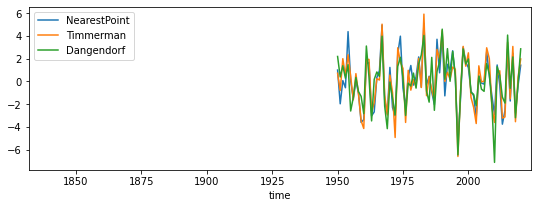

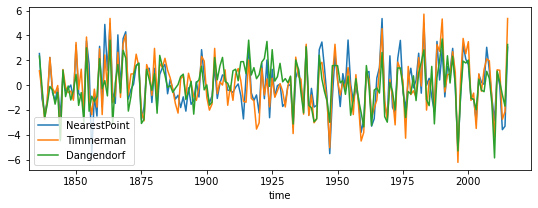

In [55]:
timeseries_obs_era5.plot(figsize = (9,3), xlim=(1832,2024))
timeseries_obs_20cr.plot(figsize = (9,3), xlim=(1832,2024))

In [56]:
i_start

114

In [57]:
i_end

179

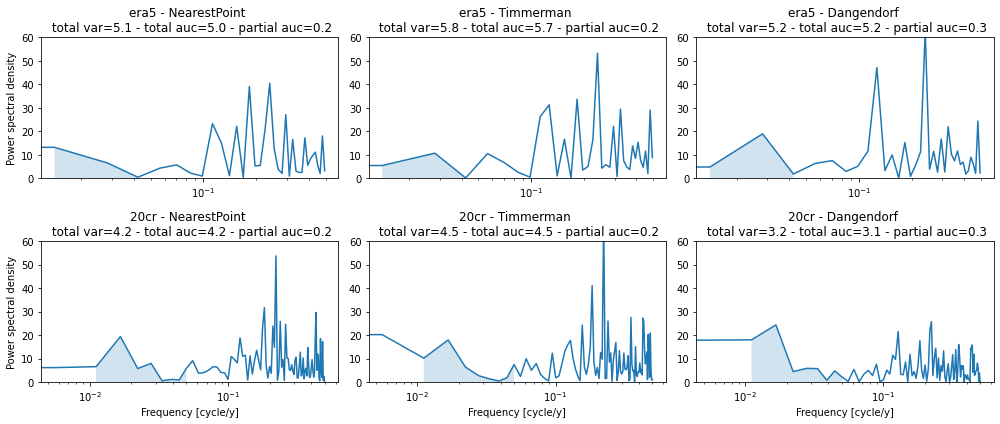

In [58]:
import matplotlib.pyplot as plt
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

n_cols = 3
n_rows = 2

period_min = 20
period_max = 100

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        
        f, Pxx = periodogram(data[i][labels_windmodel[j]])
        var = round(data[i][labels_windmodel[j]].var(),1)
        total_auc = round(auc(f, Pxx),1)
        
        i_start = next(i for i,v in enumerate(f) if v>=1/period_max)
        i_end = next(i for i,v in enumerate(f) if v>1/period_min)
        
        
        partial_auc = round(auc(f[i_start:i_end], Pxx[i_start:i_end]),1)

        
        ax.plot(f, Pxx)
        ax.fill_between(f[i_start:i_end], Pxx[i_start:i_end], alpha = 0.2)
        ax.set_xscale('log')
        ax.set_ylim(0,60)
        #ax.set_xlim(1,100)
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc}')
        if i == n_rows-1:
            ax.set_xlabel('Frequency [cycle/y]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels_windmodel[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            

plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_periodograms_1950_2015')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])    

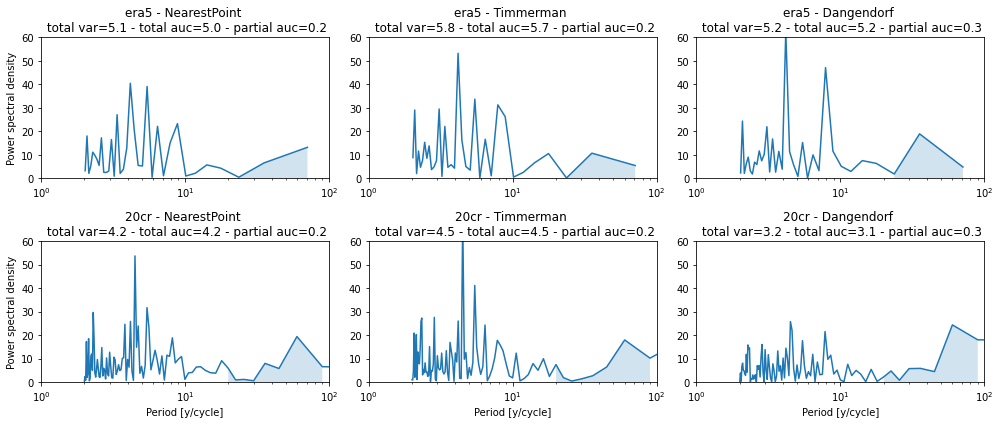

In [59]:
import matplotlib.pyplot as plt


labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

period_min = 20
period_max = 100


n_cols = 3
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        
        f, Pxx = periodogram(data[i][labels_windmodel[j]])
        var = round(data[i][labels_windmodel[j]].var(),1)
        total_auc = round(auc(f, Pxx),1)
        
        i_start = next(i for i,v in enumerate(f) if v>=1/period_max)
        i_end = next(i for i,v in enumerate(f) if v>1/period_min)
        
        partial_auc = round(auc(f[i_start:i_end], Pxx[i_start:i_end]),1)

        
        
            
        ax.plot(1/f[1:], Pxx[1:])
        ax.fill_between(1/f[i_start:i_end], Pxx[i_start:i_end], alpha = 0.2)
        ax.set_xscale('log')
        ax.set_ylim(0,60)
        ax.set_xlim(1,100)
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc}')
        if i == n_rows-1:
            ax.set_xlabel('Period [y/cycle]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels_windmodel[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            

plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_periodograms_1950_2015')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])       

In [60]:
import xarray as xr

labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
timeseries = [timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist]

var_lst = []
tot_auc_lst1 = []
part_auc_lst1 = []
for i,v in enumerate(labels_windmodel):
    detrended = detrend_dim(timeseries[i]['wind_total'].sel(station='Average', drop=True), 'time')
    var_lst.append(detrended.var(dim='time'))
    
    tot_auc_lst, part_auc_lst = [], []
    for model in detrended.model:
        data = detrended.sel(model = model)
        f, Pxx = periodogram(data.values)
        tot_auc_lst.append(round(auc(f, Pxx),1))
        
        i_start = next(i for i,v in enumerate(f) if v>=0.09)
        i_end = next(i for i,v in enumerate(f) if v>0.2)
        
        part_auc_lst.append(round(auc(f[i_start:i_end], Pxx[i_start:i_end]),1))
    
    tot_auc_lst1.append(xr.Dataset(data_vars = dict(total_auc = (['model'], tot_auc_lst)),
                                   coords = dict(model=detrended.model.values)))
    part_auc_lst1.append(xr.Dataset(data_vars = dict(partial_auc = (['model'], part_auc_lst)),
                                    coords = dict(model=detrended.model.values)))

variance_cmip6 = xr.concat(var_lst, labels_windmodel).rename({"concat_dim":"wind_model"})
tot_auc_cmip6 = xr.concat(tot_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).total_auc
part_auc_cmip6 = xr.concat(part_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).partial_auc

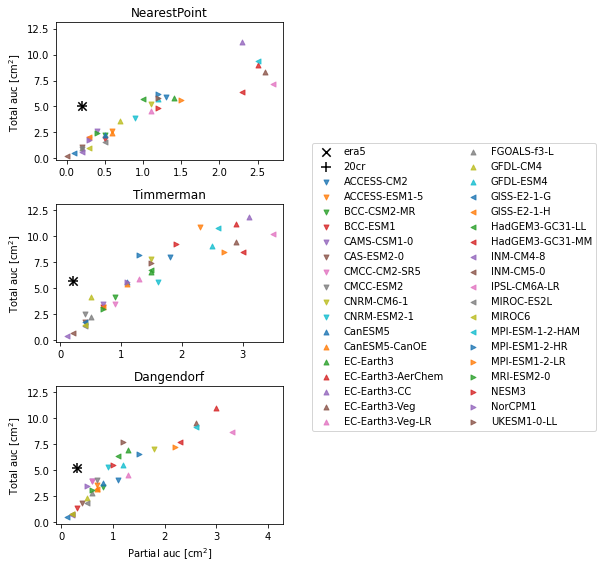

In [61]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
markers = ['v', '^', '<', '>']

n_cols = 1
n_rows = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4, 8) )

dfs = []
for i in range(n_rows):
    
    ax = axs[i]
    ax.scatter(df_spec_obs['era5', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = 'x', s=70, c='k')
    ax.scatter(df_spec_obs['20cr', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = '+', s=110, c='k')
    for j, model in enumerate(tot_auc_cmip6.model):
        ax.scatter(part_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  tot_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  marker = markers[int((3.6*j)/36)], s=25, alpha=.8)
    
    
    ax.set_ylim(-0.2,13.1)
    ax.set_ylabel('Total auc [cm$^2$]')
    ax.set_title(labels_windmodel[i])
    if i == n_rows-1:
        ax.set_xlabel('Partial auc [cm$^2$]')
    plt.tight_layout()
    
labels = labels_data + list(tot_auc_cmip6.model.values)
plt.legend(labels = labels,ncol=2, bbox_to_anchor=(2.4, 2.8))
#plt.tight_layout()


plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/tot_part_auc')



#### Spectral analysis using mtspec

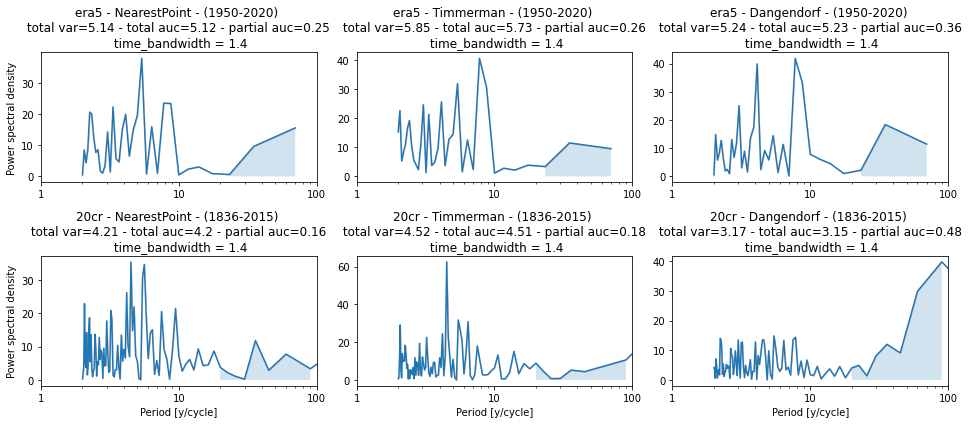

In [62]:
spec.plot_obs_full_spectra([timeseries_obs_era5, timeseries_obs_20cr], time_bandwidth=1.4, full_time_range=True, show_data = False)

In [73]:
# Create data of equal time span
data_20cr = timeseries_obs_20cr[timeseries_obs_20cr.index.isin(timeseries_cmip6_hist.index.values)]
data_cmip6 = timeseries_cmip6_hist[timeseries_cmip6_hist.index.isin(timeseries_obs_20cr.index.values)]

In [74]:
data_20cr

NearestPoint  Timmerman  Dangendorf
time                                     
1850      3.211923   3.435330    0.862575
1851     -0.667423  -0.343065   -1.637251
1852     -0.959543   1.281017   -0.607945
1853     -1.670470  -2.478745   -3.009932
1854      3.556735   3.870395    2.998136
...            ...        ...         ...
2010     -2.882582  -4.178177   -5.869270
2011      1.007037   1.229401    1.126859
2012     -0.016798   1.195795    0.243437
2013     -3.594126  -2.762565   -0.785948
2014     -3.319874  -2.137156   -1.699860

[165 rows x 3 columns]

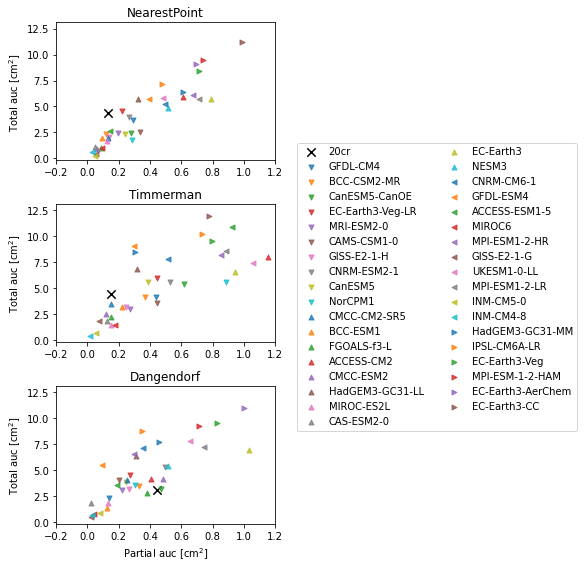

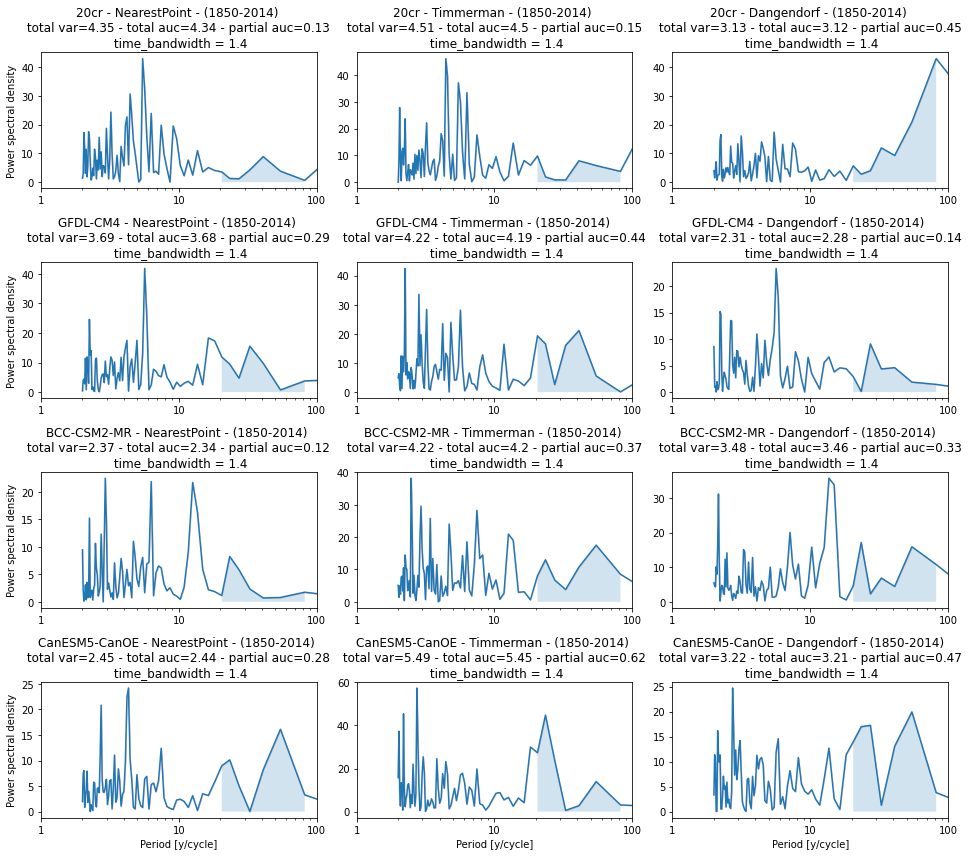

In [63]:
best_models = spec.plot_comp_20cr_cmip6(timeseries_obs_20cr, timeseries_cmip6_hist, n_cmip6 = 3)

In [72]:
best_models

NearestPoint Timmerman Dangendorf   Average
model                                                        
GFDL-CM4              0.679402  0.419721   0.892335  0.663819
BCC-CSM2-MR           2.005489  0.364235   0.364647  0.911457
CanESM5-CanOE         1.903383  1.057115    0.09108  1.017193
EC-Earth3-Veg-LR      0.263773  1.502857   1.401949  1.056193
MRI-ESM2-0            1.930064  1.462258    0.23142  1.207914
CAMS-CSM1-0           1.782824  0.985017   0.934593  1.234145
GISS-E2-1-H           2.262332  1.269425   0.188425  1.240060
CNRM-ESM2-1           0.413362  1.198545   2.167597  1.259835
CanESM5               2.012714  1.148197   0.751934  1.304282
NorCPM1               2.540855  1.354899   0.479797  1.458517
CMCC-CM2-SR5          2.389307  1.031915   0.982966  1.468063
BCC-ESM1              2.377882  1.246723   1.767984  1.797529
FGOALS-f3-L           3.323139  2.275513   0.336182  1.978278
ACCESS-CM2            1.674704  3.662055   0.988664  2.108474
CMCC-ESM2             3.478094  1.948473   1.056978  2.161182
HadGEM3-GC31-LL       1.384145  2.354536    3.27973  2.339470
MIROC-ES2L            2.692171  3.070608   1.316496  2.359759
CAS-ESM2-0            3.258467  2.632282   1.369235  2.419995
EC-Earth3             1.564912  2.231639   3.858297  2.551616
NESM3                 0.654162  4.959307   2.325893  2.646454
CNRM-CM6-1            0.933327  3.391238   3.982047  2.768870
GFDL-ESM4             1.382861  4.614063   2.450288  2.815738
ACCESS-ESM1-5         1.699471  6.478618    0.53058  2.902890
MIROC6                3.389293  3.007517   2.364989  2.920600
MPI-ESM1-2-HR         1.889748  3.767188   3.479984  3.045640
GISS-E2-1-G           3.885714   2.67017    2.63644  3.064108
UKESM1-0-LL           1.496423  3.057256   4.655485  3.069721
MPI-ESM1-2-LR         1.464046  4.140047   4.081628  3.228574
INM-CM5-0             4.129613  3.776969   2.310739  3.405774
INM-CM4-8             3.732794  4.115071    2.42418  3.424015
HadGEM3-GC31-MM       2.144227  4.040221   4.623101  3.602516
IPSL-CM6A-LR          2.879155  5.774377   5.689294  4.780942
EC-Earth3-Veg         4.072183  5.077039   6.442119  5.197113
MPI-ESM-1-2-HAM       5.150145  6.483357   6.104234  5.912579
EC-Earth3-AerChem     4.788754  6.893276    7.92311  6.535047
EC-Earth3-CC          6.966119  7.499247  12.839843  9.101736

In [83]:
best = best_models.index[:12].values

In [84]:
best

array(['GFDL-CM4', 'BCC-CSM2-MR', 'CanESM5-CanOE', 'EC-Earth3-Veg-LR',
       'MRI-ESM2-0', 'CAMS-CSM1-0', 'GISS-E2-1-H', 'CNRM-ESM2-1',
       'CanESM5', 'NorCPM1', 'CMCC-CM2-SR5', 'BCC-ESM1'], dtype=object)

In [ ]:
def plot_zos_wc_best_models_one_station(zos, ts_lst, labels, best_models, station = 'Average', show_zos = True, smoothed = False):
    """
    Function to make a plot of the zos timeseries and regression result for the best cmip6 models, for one station and for all 
    the wind contributions 
    For station choose ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Average']
    
    """
    models = best_models
    
    
    if show_zos:
        if smoothed:
            y_min = -8
            y_max = 8
        else:
            y_min = -15
            y_max = 15
    else:
        if smoothed:
            y_min = -3
            y_max = 3
        else:
            y_min = -10
            y_max = 10
    
    n_col = 4
    n_row = 3
    
    
    fig, axs = plt.subplots(n_row, n_col, figsize=(24, 20))


    for i in range(n_row):

        for j in range(n_col):
            ax = axs[i,j]


            if show_zos:
                ax.plot(zos.time.values, zos.sel(station=station, model=models[4*i]), color = 'darkgray')

            for ts in ts_lst:
                ax.plot(ts.time.values, ts.sel(station = station, model = models[4*i]).values)

            ax.set_xlabel('time [y]')
            if j == 0:
                ax.set_ylabel('zos [cm]')
            ax.axhline(color='k', linestyle='--', linewidth = 1)
            ax.set_title('model = ' + models[4*i])
            ax.set_ylim(y_min,y_max)
            plt.tight_layout()

        
            if i == 0 and j == 0:
                if show_zos:
                    ax.legend(labels = labels, bbox_to_anchor=(1, 1))
                else:
                    ax.legend(labels = labels[1:], bbox_to_anchor=(1, 1))
    
    if show_zos:
        if smoothed:
            plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/zos_wc_per_model_{station}_showzos_smoothed')
        else:
            plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/zos_wc_per_model_{station}_showzos')
    else:
        if smoothed:
            plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/zos_wc_per_model_{station}_smoothed')
        else:
            plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/zos_wc_per_model_{station}')
            
            

In [ ]:
timeseries = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_best_models_one_station(zos_lws, 
                                  [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist], 
                                  labels, best, station = 'Average', show_zos = False, smoothed = True)

In [65]:
from mtspec.multitaper import mtspec

In [66]:
spec, freq, conf_int, f_stat, n_freedom = mtspec(timeseries_obs_era5['NearestPoint'], 1.0, 2, statistics = True)

In [67]:
import matplotlib.pyplot as plt

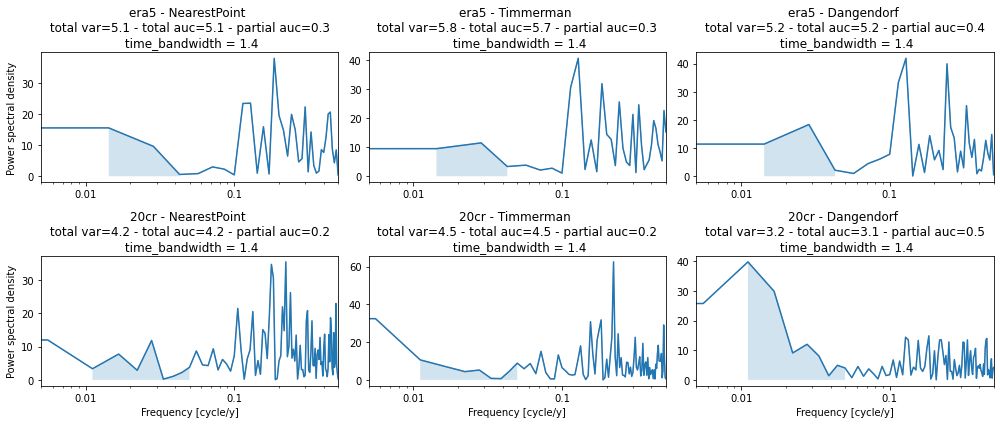

In [68]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

n_cols = 3
n_rows = 2

period_min = 20
period_max = 100


time_bandwidth = 1.4





fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        spec, freq, conf_int, f_stat, n_freedom = mtspec(data[i][labels_windmodel[j]], 1.0, time_bandwidth, statistics = True)
        var = round(data[i][labels_windmodel[j]].var(),1)
        total_auc = round(auc(freq, spec),1)
        
        i_start = next(i for i,v in enumerate(freq) if v>=1/period_max)
        i_end = next(i for i,v in enumerate(freq) if v>1/period_min)
        
        partial_auc = round(auc(freq[i_start:i_end], spec[i_start:i_end]),1)

        
        
            
        ax.plot(freq, spec)
        ax.fill_between(freq, conf_int[:, 0], conf_int[:, 1], color="tab:red", alpha=0.2)
        ax.fill_between(freq[i_start:i_end], spec[i_start:i_end], alpha = 0.2)
        ax.set_xlim(0.005,0.5)
        ax.set_xscale('log')
        ax.set_xticks([0.01,0.1])
        ax.set_xticklabels(['0.01','0.1'])
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc} '+
                     f'\n time_bandwidth = {time_bandwidth}')
        if i == n_rows-1:
            ax.set_xlabel('Frequency [cycle/y]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels_windmodel[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            
    
plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_spec_mtspec')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])   

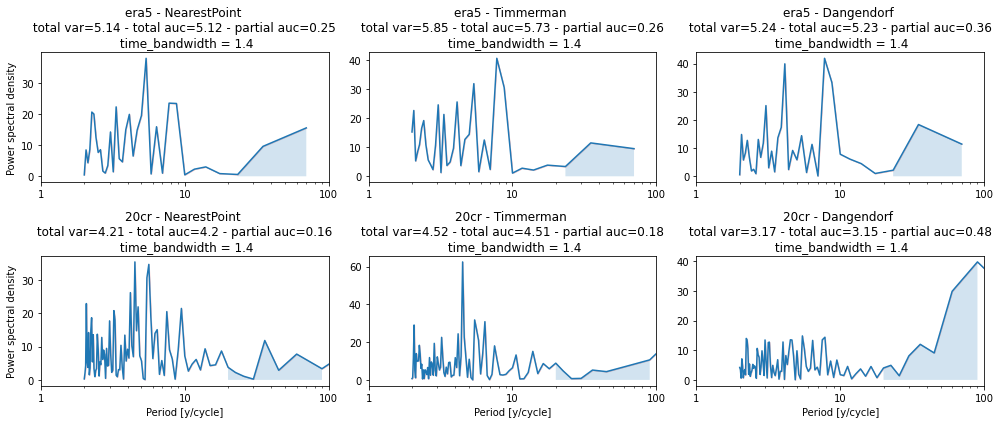

In [69]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

n_cols = 3
n_rows = 2

period_min = 20
period_max = 100


time_bandwidth = 1.4





fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        spec, freq, conf_int, f_stat, n_freedom = mtspec(data[i][labels_windmodel[j]], 1.0, time_bandwidth, statistics = True)
        var = round(data[i][labels_windmodel[j]].var(),2)
        total_auc = round(auc(freq, spec),2)
        
        i_start = next(i for i,v in enumerate(freq) if v>=1/period_max)
        i_end = next(i for i,v in enumerate(freq) if v>1/period_min)
        
        partial_auc = round(auc(freq[i_start:i_end], spec[i_start:i_end]),2)

        
        
            
        ax.plot(1/freq[1:], spec[1:])
        ax.fill_between(1/freq[1:], conf_int[1:, 0], conf_int[1:, 1], color="tab:red", alpha=0.2)
        ax.fill_between(1/freq[i_start:i_end], spec[i_start:i_end], alpha = 0.2)
        ax.set_xlim(1,100)
        ax.set_xscale('log')
        ax.set_xticks([1,10,100])
        ax.set_xticklabels(['1','10','100'])
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc} '+
                     f'\n time_bandwidth = {time_bandwidth}')
        if i == n_rows-1:
            ax.set_xlabel('Period [y/cycle]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels_windmodel[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            
    
plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_spec_mtspec')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])       

In [70]:
import xarray as xr

labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
timeseries = [timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist]

var_lst = []
tot_auc_lst1 = []
part_auc_lst1 = []
for i,v in enumerate(labels_windmodel):
    detrended = detrend_dim(timeseries[i]['wind_total'].sel(station='Average', drop=True), 'time')
    var_lst.append(detrended.var(dim='time'))
    
    tot_auc_lst, part_auc_lst = [], []
    for model in detrended.model:
        data = detrended.sel(model = model)
        spec, freq = mtspec(data.values, 1.0, time_bandwidth)
        tot_auc_lst.append(round(auc(freq, spec),1))
        
        i_start = next(i for i,v in enumerate(freq) if v>1/period_max)
        i_end = next(i for i,v in enumerate(freq) if v>1/period_min)
        
        part_auc_lst.append(round(auc(freq[i_start:i_end], spec[i_start:i_end]),1))
    
    tot_auc_lst1.append(xr.Dataset(data_vars = dict(total_auc = (['model'], tot_auc_lst)),
                                   coords = dict(model=detrended.model.values)))
    part_auc_lst1.append(xr.Dataset(data_vars = dict(partial_auc = (['model'], part_auc_lst)),
                                    coords = dict(model=detrended.model.values)))

variance_cmip6 = xr.concat(var_lst, labels_windmodel).rename({"concat_dim":"wind_model"})
tot_auc_cmip6 = xr.concat(tot_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).total_auc
part_auc_cmip6 = xr.concat(part_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).partial_auc

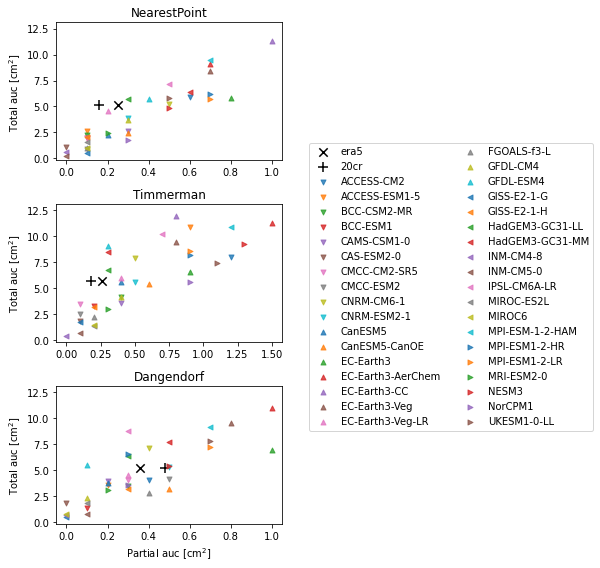

In [71]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
markers = ['v', '^', '<', '>']

n_cols = 1
n_rows = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4, 8) )

dfs = []
for i in range(n_rows):
    
    ax = axs[i]
    ax.scatter(df_spec_obs['era5', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = 'x', s=70, c='k')
    ax.scatter(df_spec_obs['20cr', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = '+', s=110, c='k')
    for j, model in enumerate(tot_auc_cmip6.model):
        ax.scatter(part_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  tot_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  marker = markers[int((3.6*j)/36)], s=25, alpha = .8)
    
    
    ax.set_ylim(-0.2,13.1)
    ax.set_ylabel('Total auc [cm$^2$]')
    ax.set_title(labels_windmodel[i])
    if i == n_rows-1:
        ax.set_xlabel('Partial auc [cm$^2$]')
    plt.tight_layout()
    
labels = labels_data + list(tot_auc_cmip6.model.values)
plt.legend(labels = labels,ncol=2, bbox_to_anchor=(2.4, 2.8))
#plt.tight_layout()


plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/tot_part_auc')

